In [256]:
import os
import re
import statistics
import pandas as pd

In [257]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [258]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))

In [259]:
df.shape

(957280, 63)

In [260]:
df.sample(10)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20000981951,010122s2000 xr a d 000 0 cze,[80-7200-423-9],None,[(brož.)],None,None,None,None,[54],[Chemie. Mineralogické vědy],"[54, (035)]",[aut],[jn20010309795],"[Kotlík, Bohumír]",None,None,[Chemie do dlaně pro SŠ /],"[Bohumír Kotlík, Květoslava Růžičková]",None,None,"[Chemie do dlaně, Chemie do dlaně pro střední školy]",[1. vyd.],None,[Havlíčkův Brod :],"[Fragment,]",[2000],None,None,None,None,None,None,None,[192 s. :],[il. ;],[10 cm],[Do dlaně. SŠ],None,None,None,None,None,None,None,"[chemie, Chemistry]",None,None,None,None,None,[příručky],[aut],[jn20010309796],"[Růžičková, Květoslava]",None,None,None,None,None,[Do dlaně.],None,None,nam a22 a 4500
nkc20223443090,220912s1945 xr ab e 000 0 cze,None,None,[(Brožováno)],None,None,None,None,[39],[Kulturní antropologie. Etnologie. Etnografie],"[39, 394.2:398, (437.322), (082), (083.97)]",None,None,None,None,None,[Památník velké národopisné slavnosti Slovácko opět žije pořádané Krúžkem moravských Slováků ve Zlíně :],None,None,None,[Slovácko opět žije],None,None,None,None,None,None,None,None,[[Česko] :],"[[nakladatel není známý],]",[[1945]],[1],[24 stran :],[ilustrace ;],[20 cm +],None,None,"[Název z obálky, Mapa částečně všita na na konci publikace]",None,None,None,None,[1941-1950],[folklorní slavnosti],None,None,[Česko],[Slovácko (Česko)],None,"[sborníky, programy]",None,None,None,None,[orm],[xx0166359],[Krúžek moravských Slováků ve Zlíně],None,None,None,None,nam a22 i 4500
nkc20243599780,240404s2024 xr a f 001 0 cze,"[978-80-257-4319-5, 978-80-7675-174-3]",None,"[(Argo ;, vázáno), (Dokořán ;, vázáno)]",[cze],[eng],[1],None,[00],[Věda. Všeobecnosti. Základy vědy a kultury. Vědecká práce],"[001, 001.11, 001.8, 165, 53, (048.8)]",[aut],[ntk20221153742],"[Marletto, Chiara]",None,[Česky],[Věda možného a nemožného :],[Chiara Marletto ; přeložil Marek Tomeček],None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Argo :, Dokořán,]",[2024],[1],[150 stran :],[ilustrace ;],[24 cm],[Zip ;],[svazek 88],[Přeloženo z angličtiny],None,None,None,None,None,"[věda, filozofie vědy, vědecká metodologie, teorie poznání, fyzika, science, philosophy of science, scientific methodology, theory of knowledge, physics]",None,None,None,None,None,"[monografie, monographs]",[trl],[xx0026997],"[Tomeček, Marek,]",[1976-],None,None,None,None,[Zip (Argo : Dokořán)],None,None,nam a22 i 4500
nkc20213322509,210504s2020 xr ab e 000 0 cze,[978-80-87488-39-3],None,"[(Eva Rozkotová ;, brožováno)]",None,None,None,None,[349],"[Pracovní, sociální, stavební právo. Právo životního prostředí]","[349.6, 502.131.1, 34, 37.091.322, (437.3), (4), (043)378.2, (082), (082.2)]",None,None,None,None,None,[Diplomové práce z oblasti práva životního prostředí oceněné Cenou Josefa Vavrouška v jubilejním 25. ročníku /],"[Milan Damohorský, Vojtěch Stejskal (eds.)]",None,None,None,None,None,None,None,None,None,None,None,[Praha :],"[Právnická fakulta, Univerzita Karlova,]",[2020],[1],[346 stran :],"[barevné ilustrace, mapy ;]",[21 cm],None,None,[Vydáno Právnickou fakultou UK v nakladatelství Eva Rozkotová],None,None,None,None,None,"[právo životního prostředí, právo životního prostředí, udržitelný rozvoj, studentská odborná činnost, environmental law, environmental law, sustainable development, student professional activities]","[None, None, právní aspekty, None, None, None, legal aspects, None]",None,"[Česko, země Evropské unie, None, Česko, Czechia, European Union countries, None, Czechia]",None,None,"[diplomové práce, sborníky, jubilejní publikace, master's theses, pape

In [261]:
df = df.explode('245_a')

In [262]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'q', 'c','u', 'r']:
        if ('x' not in nn8[7:11]) and ('u' not in nn8[7:11]):
            return int(nn8[7:11])
        else:
            return None
#    if nn8[6] == 'r':
#        if ('x' not in nn8[11:15]) and ('u' not in nn8[11:15]):
#            return int(nn8[11:15])        
    else:
        print(nn8)
        return None
#    retezec = str(c260) + " " + str(c264)
#    if 'i.e.' in retezec:
#        retezec = retezec.split('i.e.')[-1]
#    if ('vročení' in str(a500).lower()) and ('správn' in str(a500).lower()):
#        retezec = str(a500).split("správn")[-1]
#    try:
#        vysledek = re.findall(r'\d{4}', retezec)
#        mozne_roky = [int(v) for v in vysledek]
#    except:
#        pass
#    if len(mozne_roky) > 0:
#        return int(statistics.median(mozne_roky))
#    else:
#        return None

In [263]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

<Axes: xlabel='rok'>

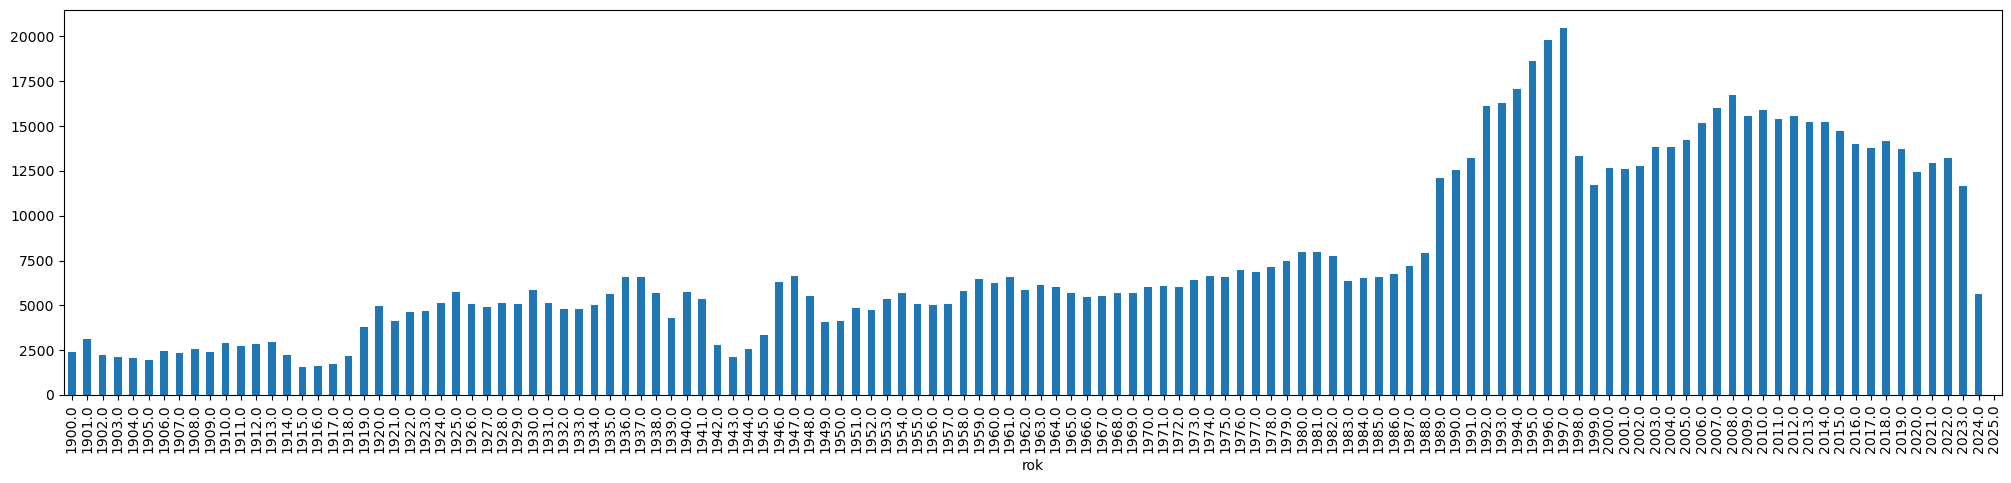

In [264]:
df.groupby("rok").size().plot.bar(figsize=(25,5))

In [265]:
df['titul'] = df['245_a'].apply(lambda x: x[:-2])
df['slov_v_nazvu'] = df['titul'].apply(lambda x: len(x.split(' ')))

In [266]:
def pocet_stran(rozsah):
    rozsah = str(rozsah)
    cisla = [int(x) for x in re.findall(r"\d{1,5}", rozsah)]
    if len(cisla) > 0:
        return max(cisla)
    else:
        return None

In [267]:
df['stran'] = df['300_a'].apply(lambda x: pocet_stran(x))

In [268]:
def zjisti_cenu(c020):
    c020 = str(c020)
    cena = None
    if 'K' in c020:
        ceny = re.findall(r'\d{1,5},{0,1}\d{0,2}',c020)
        if len(ceny) > 0:
            ceny = [float(c.replace(',','.')) for c in ceny]
            cena = min(ceny)
    if 'hal' in c020:
        ceny = re.findall(r'\d{1,5},{0,1}\d{0,2}',c020)
        if len(ceny) > 0:
            ceny = [float(c.replace(',','.')) for c in ceny]
            cena = max(ceny)
            if cena > 1:
                cena = cena / 100
    return cena

In [269]:
df['cena'] = df['020_c'].apply(lambda x: zjisti_cenu(x))

In [270]:
def vydani(o_vydani):
    vsechny_udaje = []
    slova = {'první':1,'prvé':1,'druhé':2,'třetí':3,'čtvrté': 4, 'páté': 5, 'šesté': 6, 'sedmé': 7, 'osmé': 8, 'deváté': 9, 'desáté': 10, 'jedenácté': 11, 'dvanácté': 12, 'třinácté': 13, 'čtrnácté': 14, 'patnácté': 15, 'šestnácté': 16, 'sedmnácté': 17, 'osmnácté': 18, 'devatenácté': 19, 'dvacáté': 20, 'třicáté': 30}
    rimske = {'i.': 1, 'ii.' : 2, 'iii.': 3, 'iv.': 4, 'v.': 5, 'vi.': 6, 'vii.': 7, 'viii.': 8, 'ix.': 9}
    o_vydani = str(o_vydani).lower().replace('IQ 147','').replace('68 Publishers','').replace('65. poli','').split('zákon')[0].split('narozen')[0]
    o_vydani = re.sub(r'\d{1,5}\s{0,2}(obr|výt|let)','',o_vydani)
    cifry = re.findall(r'\d{1,6}',o_vydani)
    if cifry:
        cifry = [int(c) for c in cifry if int(c) < 1000]
        vsechny_udaje += cifry
    for slovo, cislo in slova.items():
        if slovo in o_vydani:
            vsechny_udaje.append(cislo)
    for pismena, cislo in rimske.items():
        if pismena in o_vydani:
            vsechny_udaje.append(cislo)
    if len(vsechny_udaje) > 0:
        return max(vsechny_udaje)
    else:
        return None

In [271]:
df['vydani'] = df['250_a'].apply(lambda x: vydani(x))

In [272]:
def vazba(q020):
    q020 = str(q020).lower()
    if "brož" in q020:
        if ("váz" in q020) or ("pevn" in q020):
            return "oboje"
        else:
            return "brožovaná"
    elif ("váz" in q020) or ("pevn" in q020):
        return "pevná"
    else:
        return None

In [273]:
df['vazba'] = df['020_q'].apply(lambda x: vazba(x)).astype("category")

In [274]:
df.groupby('vazba').size()

C:\Users\micha\AppData\Local\Temp\ipykernel_33680\1405163450.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('vazba').size()


vazba
brožovaná    451265
oboje          1005
pevná        214317
dtype: int64

In [275]:
df['zmeneno'] = df['008'].apply(lambda x: x[0:6])

In [276]:
df[(df['zmeneno'] < '241000') & (df['rok'] < 2023)][['titul','100_a','zmeneno','rok']].sort_values(by='zmeneno',ascending=False).head(100)

,titul,100_a,zmeneno,rok
001,,,,
nkc20243631873,Tajnosti Londýna,"[Féval, Paul,]",240916,1926.0
cpk20243631957,Dětské soudy v Americe,"[Lederer, Max,]",240916,1911.0
cpk20243631999,Jednoduché účetnictví pro zemědělce,None,240916,1921.0
cpk20243632009,Demografie,None,240916,1969.0
nkc20243631917,Tajnosti Londýna,"[Féval, Paul,]",240916,1972.0
cpk20243631504,Názory starých Egypťanů o duši,"[Matiegková, Ludmila,]",240912,1916.0
cpk20243631608,Modrý květ,"[Wenig, Adolf,]",240912,1938.0
cpk20243631540,Kompensátor k měření střídavých napětí v širokém pásmu kmitočtů,"[Hlavsa, Vladimír,]",240912,1948.0
nkc20243631392,"Mňam, aneb, Prima vařečka","[Černodrinski, Stojan,]",240911,2002.0


In [288]:
df[df['100_a'].astype(str).str.contains(r'Breuer.*Miloslav',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [289]:
df[df['rok'] > 1850].sort_values(by='rok').head(20)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
np9439810,950403q19001920xr u0|0 cze,None,None,[(Brož.)],None,None,None,None,None,None,None,[aut],[jk01093195],"[Piskoř, Karel,]",[1879-1952],None,Nová vlast :,[Karel Piskoř],None,None,None,None,None,[Praha :],"[Ot. Janáček,]",[[19--]],None,None,None,None,None,None,None,[72 s. ;],None,[19 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 4500,1900.0,Nová vlast,2,72.0,NaN,NaN,brožovaná,950403
cpk19970276474,971029q19001948xr e 000 0 cze,None,None,[(Brož.)],[cze],[eng],[1],None,[22/24],[Náboženství Dálného východu. Indická náboženství. Hinduismus. Buddhismus],[294],[aut],[jn19981001950],"[Pataňdžali,]",[činný 2. století př. Kr.],None,Systém Radža-Jogy /,[Patanjali ; anglicky napsal W.Q. Judge],None,None,None,None,None,[Praha :],"[Ústřední nakladatelství okkultních děl,]",[[19--]],None,None,None,None,None,None,None,[37 s. ;],None,[21 cm],[Knihovna Isidy ;],[sv. 11],"[Přeloženo z anglického překladu, Popsáno podle xerokopie]",None,None,None,None,None,[rádžajóga],None,None,None,None,None,[příručky],None,None,None,None,None,None,None,None,[Knihovna Isidy],None,None,nam a22 a 4500,1900.0,Systém Radža-Jogy,2,37.0,NaN,NaN,brožovaná,971029
cpk19970276737,971103q19001950xr e f 000 0 cze,None,None,[(Váz.)],None,None,None,None,[133],[Ezoterismus. Okultismus],"[133.4, (035)]",None,None,None,None,None,Současná západní magie :,None,None,None,[Magie současná západní],None,None,[[Praha :],"[s.n.,]",[19--]],None,None,None,None,None,None,None,[[84] l. ;],None,[30 cm],None,None,[Zprac. dle xerokopie],None,None,None,None,None,[magie],None,None,None,None,None,[příručky],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1900.0,Současná západní magie,3,84.0,NaN,NaN,pevná,971103
cpk19970276737,971103q19001950xr e f 000 0 cze,None,None,[(Váz.)],None,None,None,None,[133],[Ezoterismus. Okultismus],"[133.4, (035)]",None,None,None,None,None,Současná západní magie :,None,None,None,[Magie současná západní],None,None,[[Praha :],"[s.n.,]",[19--]],None,None,None,None,None,None,None,[[84] l. ;],None,[30 cm],None,None,[Zprac. dle xerokopie],None,None,None,None,None,[magie],None,None,None,None,None,[příručky],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1900.0,Současná západní magie,3,84.0,NaN,NaN,pevná,971103
cpk19970276812,971031q19001950xr a e 000 0 cze,None,None,[(Váz.)],None,None,None,None,[133],[Ezoterismus. Okultismus],[133],[com],[jx20071210035],"[Kopecký, Karel]",None,None,Pravdomluvec či věštec a čtení či věštění budoucích věcí z rukou /,[na základě nejlepších pramenů sestavil Karel Kopecký],None,None,None,[4. vyd.],None,[Praha :],"[Šolc a Šimáček,]",[[19--]],None,None,None,None,None,None,None,[64 s. :],[il. ;],[22 x 30 cm],None,None,"[Zprac. dle xerokopie, rozměr předlohy 20 cm, Tab.]",None,None,None,None,None,"[věštění, chiromantie]",None,None,None,None,None,[příručky],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1900.0,Pravdomluvec či věštec a čtení či věštění budoucích věcí z rukou,11,64.0,NaN,4.0,pevná,971031
cpk19970276812,971031q19001950xr a e 000 0 cze,None,None,[(Váz.)],None,None,None,None,[133],[Ezoterismus. Okultismus],[133],[com],[jx20071210035],"[Kopecký, Karel]",None,None,Pravdomluvec či věštec a čtení či věštění budoucích věcí z rukou /,[na základě nejlepších pramenů sestavil Karel Kopecký],None,None,None,[4. vyd.],None,[Praha :],"[Šolc a Šimáček,]",[[19--]],None,None,None,N

In [290]:
def dilo(autorstvo):
    prac1 = df[df['100_a'].astype(str).str.contains(autorstvo,na=False)][['titul','rok','vydani','100_a','100_4','700_a','700_4']]
    prac2 = df[df['700_a'].astype(str).str.contains(autorstvo,na=False)][['titul','rok','vydani','100_a','100_4','700_a','700_4']].dropna(subset=['700_a','700_4']).explode(['700_a','700_4'])
    prac2 = prac2[(prac2['700_a']).str.contains(autorstvo,na=False) & (prac2['700_4'] == 'aut')]
    return pd.concat([prac1,prac2]).drop_duplicates(subset=['titul','rok']).sort_values('rok')

In [291]:
def tvurce(autorstvo, role):
    prac = df[df['700_a'].astype(str).str.contains(autorstvo,na=False)][['titul','rok','vydani','100_a','100_4','700_a','700_4']].explode(['700_a','700_4'])
    prac = prac[(prac['700_a']).str.contains(autorstvo,na=False) & (prac['700_4'] == role)]
    return prac.drop_duplicates(subset=['titul','rok']).sort_values('rok')

In [292]:
dilo('Němcová, Božena').tail(50)

,titul,rok,vydani,100_a,100_4,700_a,700_4
001,,,,,,,
nkc20071783751,Karla,2010.0,1.0,"[Němcová, Božena,]",[aut],None,None
nkc20112251177,Babička,2011.0,1.0,"[Němcová, Božena,]",[aut],"[Kašpar, Adolf,]",[ill]
nkc20112236386,Sedmero pohádek,2011.0,1.0,"[Němcová, Božena,]",[aut],None,None
nkc20112179422,Nejkrásnější pohádky a bajky,2011.0,NaN,"[Erben, Karel Jaromír,]",[aut],"Němcová, Božena,",aut
nkc20112224858,Zlatá kniha pohádek,2011.0,NaN,"[Erben, Karel Jaromír,]",[aut],"Němcová, Božena,",aut
nkc20122358476,Z pokladnice našich pohádek,2011.0,NaN,"[Němcová, Božena,]",[aut],"[Pítrová, Lucie,, Matějová, Eva]","[ill, com]"
nkc20122414905,Divá Bára a jiné dívky na útěku,2012.0,NaN,"[Němcová, Božena,]",[aut],"[Janáčková, Jaroslava,]",[aft]
nkc20122275935,Chudí lidé,2012.0,2.0,"[Němcová, Božena,]",[aut],"[Korbelová, Nela,]",[ill]
nkc20122410457,Bylo nebylo,2012.0,6.0,"[Němcová, Božena,]",[aut],"[Zmatlíková, Helena,, Peisertová, Alena]","[ill, edt]"


In [293]:
df[['008','700_a','700_4']].dropna().explode(['700_a','700_4']).groupby('700_4')['700_a'].nunique().nlargest()

700_4
aut    88440
edt    23740
trl    22551
ill    16385
com    14150
Name: 700_a, dtype: int64

In [294]:
explo700 = df[['008','rok','700_a','700_4']].dropna().explode(['700_a','700_4'])
for c in explo700.columns:
    explo700[c] = explo700[c].apply(lambda x: str(x).replace(",","").strip())

In [295]:
def spoluautorstvo(jmeno):
    prac = explo700[(explo700['700_a'].str.contains(jmeno.replace(",",""), na=False))]
    seznam = prac['008'].drop_duplicates().to_list()
    prac2 = explo700[explo700['008'].isin(seznam)]
    prac3 = prac2[~prac2['700_a'].str.contains(jmeno.replace(",",""), na=False)].groupby('700_a').size().sort_values(ascending=False)
    if len(prac3) > 0:
        return prac3
    else:
        return None

In [296]:
spoluautorstvo('Hlavenka, Jiří').head(30)

700_a
Broža Petr           3
Štěpánek Josef       2
Špaček Martin        2
Antonínová Hana      2
Kofroň Václav        2
Werich Jan           2
Větvička Václav      2
VanRyper William     2
Dolejš Radan         2
Hromádková Dagmar    2
Sachse Guido         1
Nienhaus Franz       1
Orlová Kateřina      1
Pohunek Milan        1
Pojsl Josef          1
Robinson Simon       1
Slezák Petr          1
Scambray Joel        1
Severa František     1
Kurtz George         1
Tesař Vlastimil      1
Vančura Bohumil      1
Vondrák Vojtěch      1
Woodcock John        1
Čevela Radek         1
Marmel Elaine        1
Anders Uwe           1
Krátký Robert        1
Dudr Jaroslav        1
Balcová Katarína     1
dtype: int64

In [297]:
explo700[explo700['700_a'].str.contains('Hlavenka Jiří')]

,008,rok,700_a,700_4
001,,,,
cpk19970184756,970224s1995 xr a e 001 0 cze,1995.0,Hlavenka Jiří,trl
cpk19970184756,970224s1995 xr a e 001 0 cze,1995.0,Hlavenka Jiří,trl
cpk19970287016,980116s1997 xr a e 001 0 cze,1997.0,Hlavenka Jiří,aut
cpk19970287016,980116s1997 xr a e 001 0 cze,1997.0,Hlavenka Jiří,aut
cpk19980390050,981016s1998 xr a e 001 0 cze,1998.0,Hlavenka Jiří,aut
cpk20010884776,000425s2000 xr a e 001 0 cze,2000.0,Hlavenka Jiří,aut
cpk20011008825,010912s2001 xr a e 001 0 cze,2001.0,Hlavenka Jiří,aut
cpk20020887477,001220s2000 xr a e 001 0 cze,2000.0,Hlavenka Jiří,aut
cpk20021124514,020913s2002 xr a e f 001 0 cze,2002.0,Hlavenka Jiří,aut


In [298]:
explo700.groupby('700_a')['rok'].nunique().nlargest(50)

700_a
Lada Josef             99
Čapek Josef            95
Burian Zdeněk          91
Aleš Mikoláš           88
Bouda Cyril            80
Němcová Božena         79
Trnka Jiří             78
Fischer Otokar         77
Zmatlíková Helena      73
Svolinský Karel        72
Novotný František      71
Kašpar Adolf           70
Erben Karel Jaromír    69
Hrubín František       69
Čapek Karel            69
Novák Josef            68
Skoumal Aloys          67
Born Adolf             66
Novotný Vladimír       66
Scheiner Artuš         66
Zaorálek Jaroslav      66
Lhoták Kamil           64
Tichý František        63
Vrchlický Jaroslav     63
Zábrana Jan            63
Černý Jan              62
Grimm Wilhelm Karl     61
Kundera Ludvík         61
Jindra Miroslav        60
Müller Karel           60
Dvořák Jan             59
Eisner Pavel           59
Novák Jiří Zdeněk      59
Sekora Ondřej          59
Černý Věnceslav        59
Houbová Věra           58
Shakespeare William    58
Svoboda Karel          58
Dvořák

In [299]:
for profese in explo700.groupby('700_4').size().nlargest(50).index.to_list():
    print(f"{profese}: {explo700[explo700['700_4'] == profese].groupby('700_a')['rok'].nunique().nlargest(5).index.to_list()}")

aut: ['Mrštík Vilém', 'Němcová Božena', 'Styblík Vlastimil', 'Novák Josef', 'Werich Jan']
trl: ['Zaorálek Jaroslav', 'Fischer Otokar', 'Skoumal Aloys', 'Zábrana Jan', 'Houbová Věra']
ill: ['Lada Josef', 'Burian Zdeněk', 'Aleš Mikoláš', 'Čapek Josef', 'Trnka Jiří']
edt: ['Dvořák Jan', 'Vrána Jan', 'Novotný Miloslav', 'Justl Vladimír', 'Havel Rudolf']
aui: ['Novotný Vladimír', 'Dvořák František', 'Kundera Ludvík', 'Valoch Jiří', 'Dufek Antonín']
com: ['Jursa Jan', 'Novotný Miloslav', 'Vykoukal František Vladimír', 'Müller Ondřej', 'Pešek Jiří']
pht: ['Doležal Vladimír', 'Štecha Pavel', 'Poláček Jiří', 'Thoma Zdeněk', 'Fyman Vladimír']
art: ['Fulín Miloslav', 'Novotný Leo', 'Ziegler Zdeněk', 'Hlavsa Oldřich', 'Albich Milan']
None: ['Shakespeare William', 'Defoe Daniel', 'Verne Jules', 'Saint-Exupéry Antoine de', 'Simenon Georges']
aft: ['Pohorský Miloš', 'Hilský Martin', 'Krejčí Karel', 'Novotný Vladimír', 'Blahynka Milan']
oth: ['Sonnbergová Marta', 'Masaryk Tomáš Garrigue', 'Gaudl Karel

In [300]:
explo700[explo700['700_4'] == 'ill'].groupby('700_a').size().nlargest(20)

700_a
Born Adolf              581
Burian Zdeněk           574
Zmatlíková Helena       525
Disney Walt             329
Winter-Neprakta Jiří    309
Šplíchal Antonín        304
Trnka Jiří              294
Lada Josef              285
Němeček Jaroslav        284
Bouda Cyril             283
Jakešová Miroslava      276
Krejčová Zdeňka         258
Svolinský Karel         248
Čapek Josef             231
Aleš Mikoláš            229
Černý Věnceslav         212
Kašpar Adolf            209
Popprová Andrea         208
Plicková Edita          196
Martenek Miloslav       187
dtype: int64

In [304]:
df[df['100_7'].astype(str).str.contains('rcp',na=False)][['titul','rok','100_a','100_4','700_a','700_4']]

,titul,rok,100_a,100_4,700_a,700_4
001,,,,,,


In [305]:
ceske_romany = df.explode('072_a')
ceske_romany = ceske_romany[ceske_romany['072_a'] == '821.162.3-3']
ceske_romany = ceske_romany[ceske_romany['vydani'] == 1]

In [ ]:
ceska_proza = df.explode('072_a')

In [306]:
ceske_romany.groupby('rok').size()

rok
1904.0       1
1906.0       1
1908.0       1
1911.0       1
1917.0       1
1918.0       1
1920.0       1
1922.0       1
1923.0       1
1924.0       2
1925.0       1
1926.0       2
1927.0       2
1928.0       1
1929.0       2
1930.0       7
1931.0       1
1932.0       2
1933.0       1
1934.0       3
1935.0       2
1936.0       3
1938.0       2
1939.0       1
1940.0       2
1941.0       2
1942.0      13
1943.0      37
1944.0      51
1945.0      25
1946.0      40
1947.0      44
1948.0      20
1949.0      12
1950.0      20
1951.0      32
1952.0      21
1953.0      21
1954.0      31
1955.0      50
1956.0     103
1957.0      89
1958.0      42
1959.0      50
1960.0      66
1961.0      30
1962.0      43
1963.0      41
1964.0      48
1965.0      40
1966.0      51
1967.0      51
1968.0      62
1969.0      70
1970.0      51
1971.0      42
1972.0      50
1973.0      48
1974.0      59
1975.0      64
1976.0      55
1977.0      43
1978.0      63
1979.0      61
1980.0      49
1981.0      67
1982.0

In [307]:
cr1 = ceske_romany[ceske_romany['vydani'] == 1]

<Axes: xlabel='rok'>

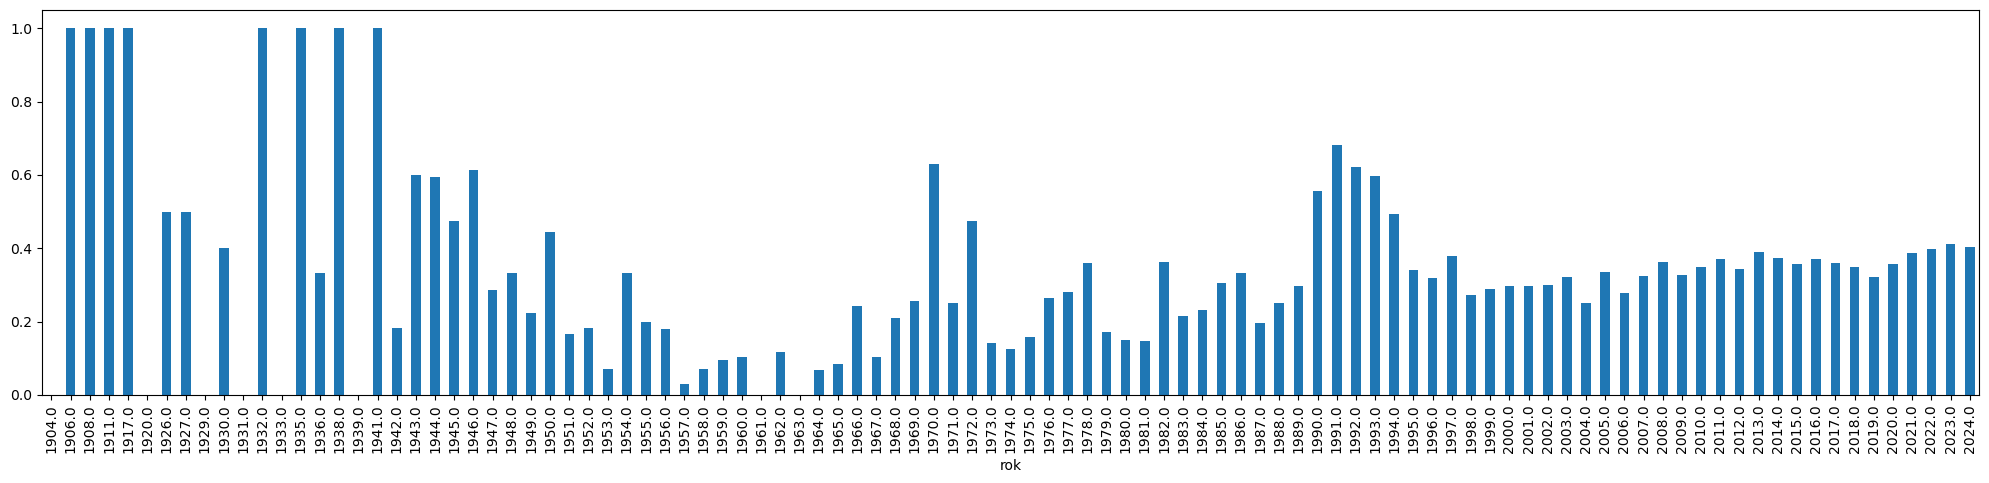

In [308]:
(cr1[cr1['vazba'] == 'brožovaná'].groupby('rok').size() / cr1[cr1['vazba'].isin(['pevná','brožovaná','oboje'])].groupby('rok').size()).plot.bar(figsize=(25,5))

In [309]:
ceske_romany[ceske_romany['vydani'] == 1].groupby('rok').size().tail(50)

rok
1975.0      64
1976.0      55
1977.0      43
1978.0      63
1979.0      61
1980.0      49
1981.0      67
1982.0      66
1983.0      43
1984.0      53
1985.0      47
1986.0      45
1987.0      41
1988.0      54
1989.0      81
1990.0     142
1991.0     179
1992.0     287
1993.0     356
1994.0     265
1995.0     438
1996.0     483
1997.0     514
1998.0     299
1999.0     321
2000.0     409
2001.0     351
2002.0     428
2003.0     457
2004.0     500
2005.0     558
2006.0     566
2007.0     641
2008.0     650
2009.0     684
2010.0     755
2011.0     815
2012.0     810
2013.0     785
2014.0     833
2015.0     895
2016.0    1021
2017.0     979
2018.0     969
2019.0    1027
2020.0    1026
2021.0    1164
2022.0    1155
2023.0    1022
2024.0     577
dtype: int64

In [310]:
ceske_romany[ceske_romany['rok'] == 2024]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20223473733,221124s2024 xr a e 000 f cze,[978-80-11-02557-1],None,[(brožováno)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-31, (0:82-31)]","[aut, pbl]",None,"[Ludvík, Ludvík]",None,None,"Moje bývalá, budoucí, nastávající minulost /",[Ludvík Ludvík],None,None,None,[1. vydání],None,None,None,None,None,None,None,[V Brně :],"[nákladem autora,]",[2024],[1],[295 stran :],[ilustrace ;],[21 cm],None,None,None,None,None,[Pro čtenáře od 18 let],None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,[Ludvík Ludvík],None,nam a22 i 4500,2024.0,"Moje bývalá, budoucí, nastávající minulost",5,295.0,NaN,1.0,brožovaná,221124
nkc20233524909,240130s2024 xr a d 000 j cze,[978-80-242-9323-3],None,[(vázáno)],None,None,None,None,821.162.3-3,"[Česká próza, Literatura pro děti a mládež (beletrie)]","[821.162.3-32, 82-93-053.67, 82-93-053.6, 821-93-053.67, 821-93, (437.3), (0:82-32), (082.21)]",[aut],[xx0220156],"[Merglová, Michaela,]",[1990-],None,Za pět minut zvoní /,"[Michaela Merglová, Eva Maříková, Eva Pospíšilová a Klára Pospíšilová, Aleš Novotný, Jana Pavloušková, Karolína Skácelová, Michaela Červenková, Lenka Poláčková, Zuzana Žáčková, Kateřina Šardická, ...",None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Euromedia Group,]",[2024],[1],[253 stran :],[barevné ilustrace ;],[20 cm],[Yoli],None,[Podnázev v tiráži: antologie českých young adult povídek],[Sbírka příběhů pro mládež ze školních lavic. Několik známých českých autorů a autorek vám připomene radosti i strasti povinné školní docházky.],"[S hrdiny povídek odhalíte tajemnou šifru načmáranou na staré školní lavici, seberete odvahu a vzepřete se školním pravidlům, navážete jedinečná přátelství a prožijete stejně nezapomenutelnou lásk...",[Pro čtenáře od 13 let],None,[21. století],"[česká povídka, literatura young adult, literatura pro mládež, Czech short stories, young adult literature, juvenile literature]",None,"[21. století, 21. století, 21. století, 21st century, 21st century, 21st century]","[None, Česko, Česko, None, Czechia, Czechia]",None,None,"[české povídky, antologie, literatura young adult, publikace pro mládež, Czech short stories, anthology, young adult literature, juvenile literature]","[aut, aut, aut, aut, aut, aut, aut, aut, aut, aut, aut, aut]","[xx0313331, mzk2016898135, xx0256026, xx0241674, xx0276229, xx0267899, xx0192286, jo20221150966, xx0311477, xx0235576, xx0234171, xx0253640]","[Maříková, Eva, Pospíšilová, Eva, Pospíšilová, Klára,, Novotný, Aleš,, Pavloušková, Jana,, Skácelová, Karolína,, Červenková, Michaela,, Poláčková, Lenka, Žáčková, Zuzana,, Šardická, Kateřina,, Nov...","[None, None, 1990-, 1990-, 1985-, 1996-, 1997-, None, 1994-, 1991-, 1998-, None]",None,None,None,None,[Yoli],None,None,nam a22 i 4500,2024.0,Za pět minut zvoní,4,253.0,NaN,1.0,pevná,240130
nkc20233529121,240523s2024 xr g 000 j cze,[978-80-207-2188-4],None,[(vázáno)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-32, (0:82-32)]",[aut],[jk01061137],"[Kohout, Pavel,]",[1928-],None,Taková láska :,[Pavel Kohout],None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Odeon,]",[2024],[1],[214 stran ;],None,[21 cm],None,None,None,"[Soubor příběhů, které se mohly stát, dějí a některé se možná budou dít, jak napovídá podtitul knihy význačného českého autora.]","[Pro spisovatele a dramatika Pavla Kohouta psát znamená žít. A tak celý život střádá, promýšlí, přetv

<Axes: xlabel='rok'>

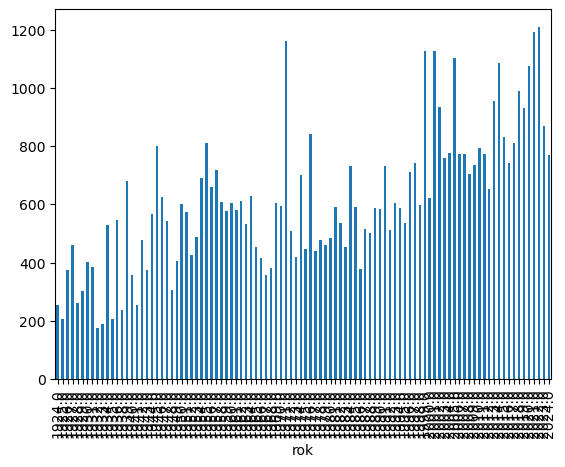

In [311]:
ceske_romany[ceske_romany['vydani'] == 1].groupby('rok')['stran'].max().tail(100).plot.bar()

<Axes: xlabel='rok'>

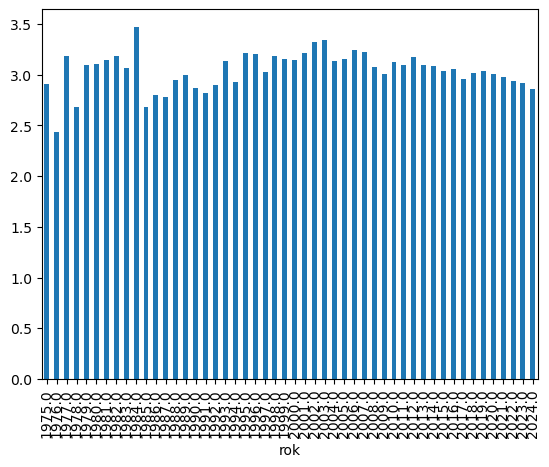

In [312]:
ceske_romany.groupby('rok')['slov_v_nazvu'].mean().tail(50).plot.bar()

In [313]:
ceske_romany.sample(20)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20233497747,230307s2023 xr g 000 j cze,[978-80-88243-78-6],None,[(vázáno)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-32, (0:82-321.1), (082.21)]",[aut],[jk01040338],"[Havlíček, Jaroslav,]",[1896-1943],None,Zánik městečka Olšiny /,[Jaroslav Havlíček ; sestavil a doslovem opatřil Petr Boček],None,None,None,[1. vydání v tomto souboru],None,None,None,None,None,None,None,[Kroměříž :],"[Carcosa,]",[2023],[1],[296 stran ;],None,[21 cm],[Temnosti ;],[svazek 5],None,None,None,None,None,None,None,None,None,None,None,None,"[české povídky, psychologické povídky, výbory, Czech short stories, psychological short stories, selected works]",[com],[jn99240000090],"[Boček, Petr,]",[1967-],None,None,None,None,[Temnosti],None,None,nam a22 i 4500,2023.0,Zánik městečka Olšiny,3,296.0,NaN,1.0,pevná,230307
nkc20102157365,110331s2010 xr g 000 f cze,[978-80-7453-034-0],None,[(brož.)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-3, (0:82-3)]",[aut],[jx20110331006],"[Hálková, Hana,]",[1956-],None,Aby nám zvonečky ladily /,[Hana Hálková],None,None,None,[1. vyd.],None,[[České Budějovice] :],"[Nová Forma,]",[2010],None,None,None,None,None,None,None,[225 s. ;],None,[21 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české prózy, Czech prose]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,2010.0,Aby nám zvonečky ladily,4,225.0,NaN,1.0,brožovaná,110331
nkc20193094819,190502s2019 xr g 000 jacze,[978-80-7422-676-2],"[Kč 269,00]",[(vázáno) :],None,None,None,None,821.162.3-3,"[Česká próza, Biografie]","[821.162.3-32, 821.162.3-055.2, 316.728, 929, (495), (0:82-322.6)]",[aut],[xx0097066],"[Smetanová, Pavla,]",[1974-],None,Příběhy z korfských uliček /,"[Pavla Smetanová, Souzanna Ofelia Damaskinou]",None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[NLN,]",[2019],[1],[252 stran ;],None,[21 cm],None,None,None,"[Kniha sestavená z autobiografických povídek české spisovatelky a zahraniční zpravodajky, nás seznamuje s jejím každodenním životem na řeckém ostrově Korfu.]","[Kdo z nás někdy nesnil o životě na ostrově? Tam, kde svítí slunce po celý rok, dívat se ze stínu olivovníku na blankytné moře, popíjet výtečné víno a poslouchat cvrkot cikád? Autorka se už potřet...",None,None,[20.-21. století],"[české spisovatelky, každodenní život, Czech women authors, everyday life]",None,"[20.-21. století, 20.-21. století, 20th-21st centuries, 20th-21st centuries]","[None, Řecko, None, Greece]","[Korfu (Řecko : ostrov), Kerkyra Island (Greece)]",None,"[české povídky, autobiografické povídky, Czech short stories, autobiographical short stories]",[aut],[xx0235873],"[Damaskinou, Souzanna Ofelia,]",[2005-],None,None,None,None,None,[Nakladatelství Lidové noviny],None,nam a22 i 4500,2019.0,Příběhy z korfských uliček,4,252.0,269.00,1.0,pevná,190502
nkc20172961783,171211t20172017xr a g 000 j cze,[978-80-906335-4-4],None,[(brožováno)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-32, (0:82-32), (082.21)]",None,None,None,None,None,Když nebe zebe :,None,None,None,None,[1. vydání],None,None,None,None,None,None,None,"[[Plzeň] :, None]","[Petr Nazarov,, None]","[[2017], ©2017]","[1, 4]",[175 stran :],[ilustrace ;],[21 cm],None,None,None,None,None,None,None,[21. století],"[česká povídka, Czech short stories]",None,"[21. století, 21st century]",None,None,None,"[české povídky, antologie, Czech short stories, anthology]",None,None,None,None,None,None,None,None,None,None,None,

<Axes: xlabel='rok'>

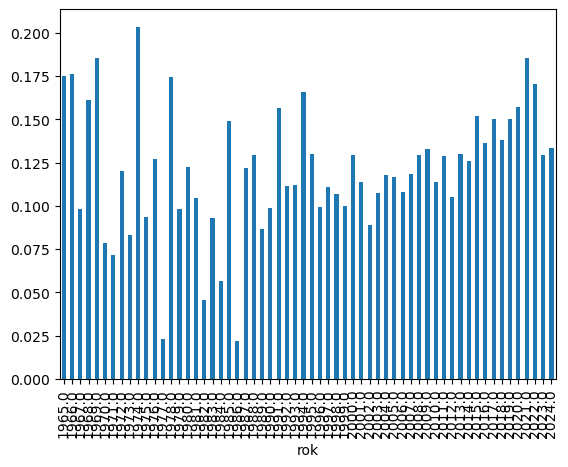

In [314]:
(ceske_romany[(ceske_romany['slov_v_nazvu'] == 1)].groupby('rok').size() / ceske_romany.groupby('rok').size()).tail(60).plot.bar()

In [315]:
pd.set_option('display.max_colwidth', 200)

In [316]:
ceske_romany[['rok','100_a','titul','slov_v_nazvu']].sort_values(by='slov_v_nazvu',ascending=False).head(50)

,rok,100_a,titul,slov_v_nazvu
001,,,,
bk196701838,1967.0,"[Vyskočil, Ivan,]","Tohle se jmenuje Malé hry, kde hláska há ve slově hry je neznělá, takže se tento název vyslovuje a taky znamená Maléry",22
nkc20193161463,2019.0,"[Hladký, Marek,]","Halóóó, tady Lucifa!, aneb, Fantastické dobrodružství Lucify a Dominika o tom, co je silnější než smrt a mocnější než čas",20
nkc20162825571,2016.0,"[Suček, Pavel,]","Povídání o důlních skřítcích Jakubovi, Janovi a Aloisovi z jižních Čech ze zlatonosné oblasti mezi Kasejovicemi a Bělčicemi",18
nkc20071727351,2007.0,"[Dobner, Libor,]","Bořek, kluk ze znaku a dva tucty nejstarších pověstí a příběhů od Slané vody věnovaných dětem a mládeži",18
bk196704458,1967.0,"[Jírek, Bohumil,]",O hodně tlusté čáře redisovým perem číslo tři a jiná pohádková vyprávění pro 3. a a 4. b,18
cpk20011004879,2001.0,"[Puluh-Pilstein, Jiří,]","Hádala se duše s pérem, aneb, Malá encyklopedie náboženství a erotiky, nebo taky, Sex and God and rock'n'roll",18
cpk19960150238,1995.0,None,Příběhy vyprávěné při setkání spolužáků v sobotu dne 16.9.1995 v Třebíčské ulici č. 40 ve Velkém Meziříčí,17
nkc20081811246,2008.0,"[Peroutková-Šafránková, Soňa,]","Je pro mě láska, která už zůstane?, aneb, K jakému poznání jsem došla díky svým prožitým vztahům",17
cpk19960150238,1995.0,None,Příběhy vyprávěné při setkání spolužáků v sobotu dne 16.9.1995 v Třebíčské ulici č. 40 ve Velkém Meziříčí,17


<Axes: xlabel='rok'>

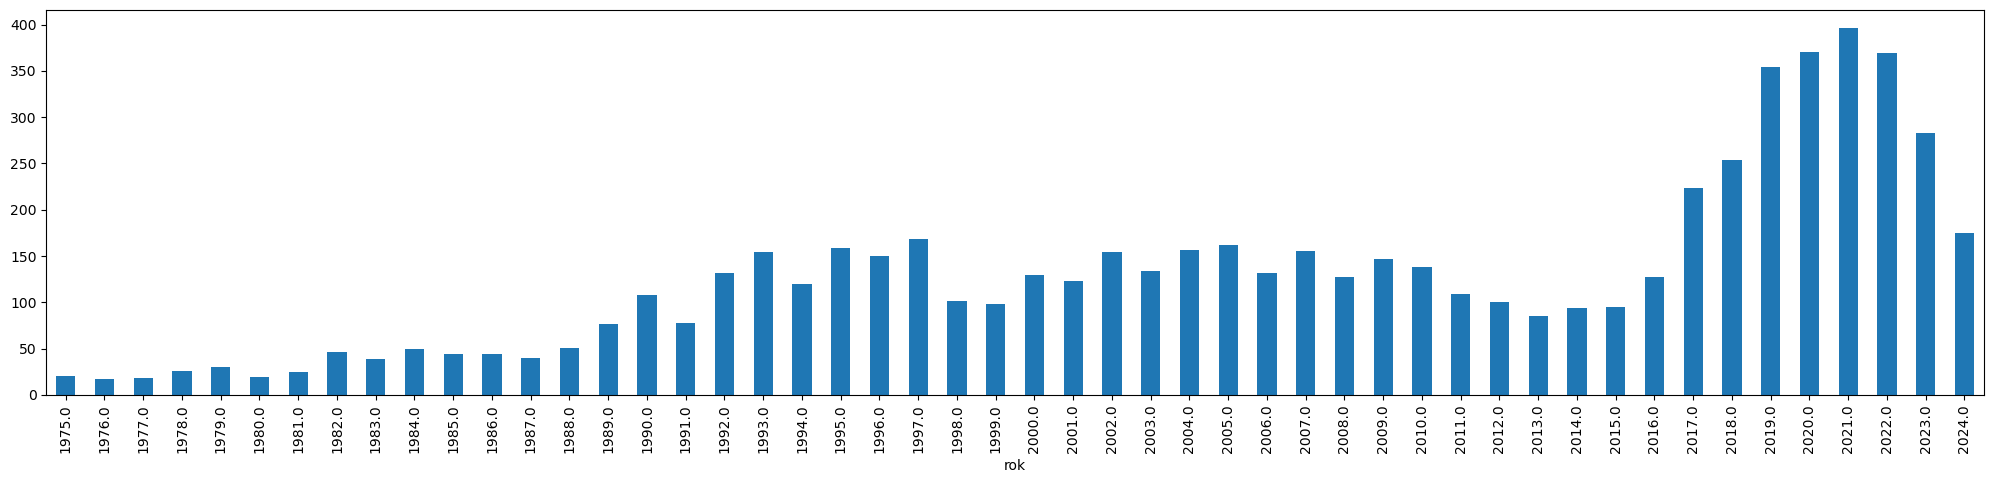

In [317]:
ceske_romany[ceske_romany['cena'].notnull()].groupby('rok').size().tail(50).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

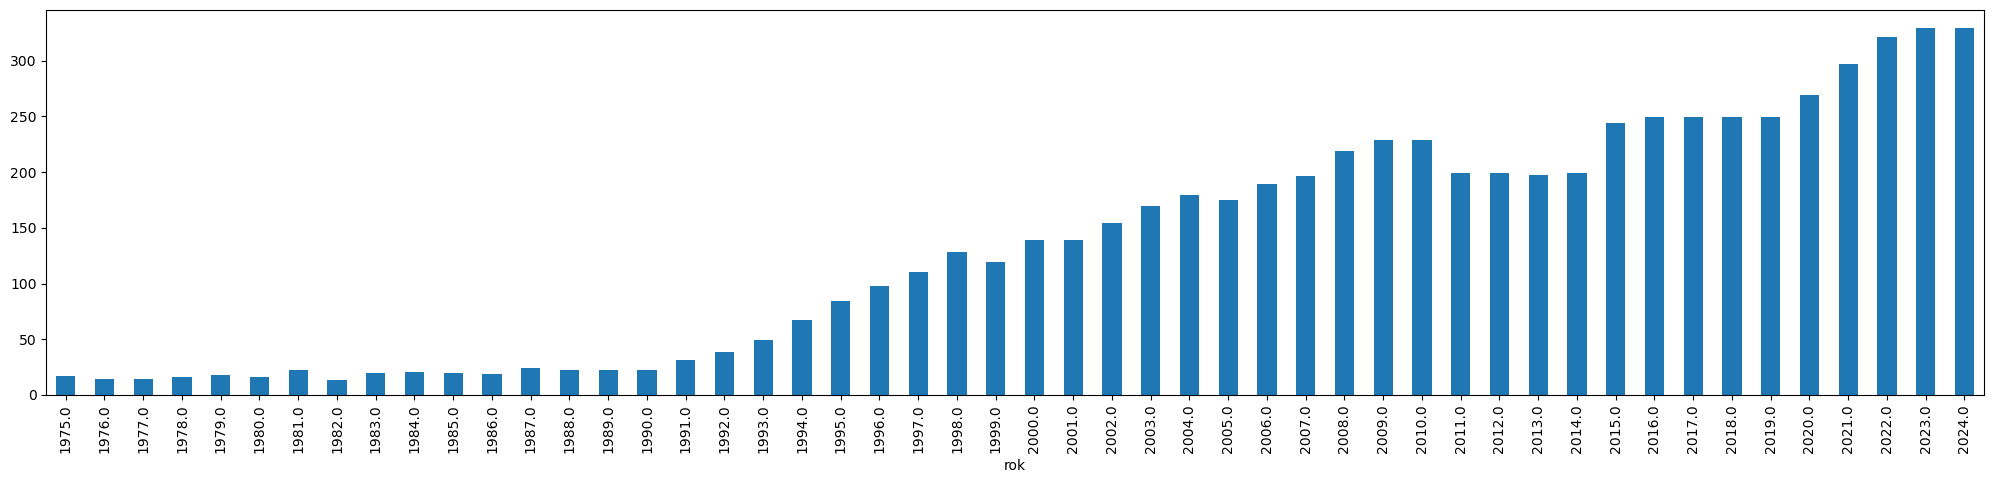

In [318]:
ceske_romany.groupby('rok')['cena'].median().tail(50).plot.bar(figsize=(25,5))

In [319]:
ceske_romany.groupby('rok')['cena'].median().tail(50)

rok
1975.0     17.00
1976.0     14.00
1977.0     14.75
1978.0     16.00
1979.0     17.50
1980.0     16.00
1981.0     22.00
1982.0     13.50
1983.0     20.00
1984.0     21.00
1985.0     20.00
1986.0     19.00
1987.0     24.00
1988.0     22.00
1989.0     22.00
1990.0     22.00
1991.0     31.50
1992.0     38.50
1993.0     49.00
1994.0     67.00
1995.0     84.00
1996.0     98.00
1997.0    110.00
1998.0    128.00
1999.0    119.00
2000.0    139.00
2001.0    139.00
2002.0    154.00
2003.0    169.50
2004.0    179.00
2005.0    174.50
2006.0    189.50
2007.0    196.50
2008.0    219.00
2009.0    229.00
2010.0    229.00
2011.0    199.00
2012.0    199.00
2013.0    197.00
2014.0    199.00
2015.0    244.00
2016.0    249.00
2017.0    249.00
2018.0    249.00
2019.0    249.00
2020.0    269.00
2021.0    297.00
2022.0    321.00
2023.0    329.00
2024.0    329.00
Name: cena, dtype: float64

In [320]:
ceske_romany[ceske_romany['rok'] == 2024][['titul','100_a']].sample(50)

,titul,100_a
001,,
nkc20243604575,Chrám Azylu,"[Lukačovičová, Lucie,]"
nkc20243623796,Přívěsek z čaroitu,"[Bártová, Anna Beatrix,]"
nkc20243587779,Kouzelná třída v knihovně,"[Pospíšilová, Zuzana,]"
nkc20243608101,"Hledám, hledám","[Restrepo, Kamila,]"
nkc20243624008,Pokud láska zvítězí,"[Šašová, Beata,]"
nkc20243596454,Světluška,"[Oborná, Lenka,]"
nkc20243611320,"Liška mění srst, ne povahu","[Hamšíková, Anna,]"
nkc20243588267,Dům za lesem,"[Jakoubková, Marie,]"
nkc20243613936,Tenkrát v Plzenci,"[Fencl, Ivo,]"


<Axes: xlabel='rok'>

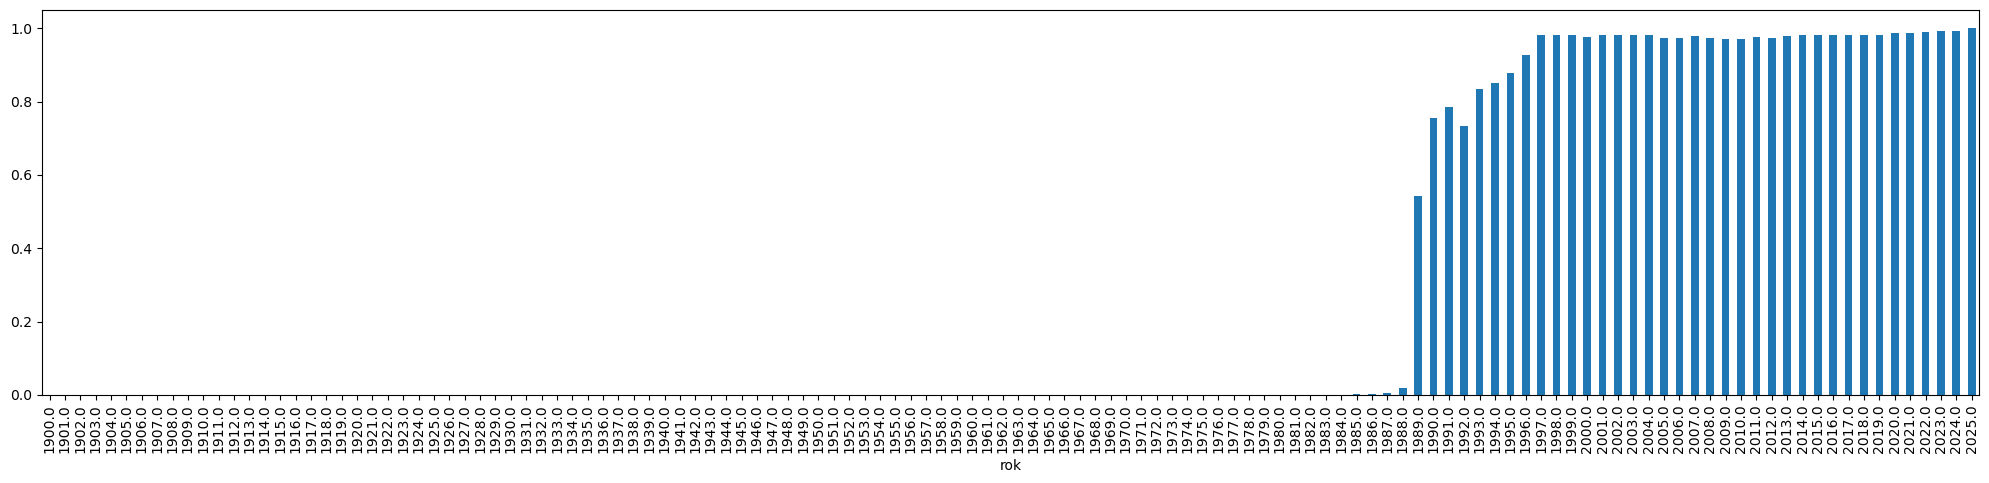

In [321]:
(df[df['020_a'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [322]:
df[(df['020_a'].isnull()) & (df['rok'] > 2002)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpe20031240927,030305s2003 xr s ||| | cze,None,None,None,"[cze, ger, eng]",None,[0],None,[902],[Archeologie],"[902:904, 902.2, (437.319), (0.034.4)]",None,None,None,None,None,Archeologické výzkumy v regionu Český Krumlov,None,None,None,None,None,None,[Český Krumlov :],"[Oficiální informační systém regionu Český Krumlov,]",[2003],None,None,None,None,None,None,None,[1 elektronický optický disk (CD-R) :],[barev. ;],[12 cm],None,None,"[Vytvořeno za finanční podpory Ministerstva kultury České republiky, Verze též v němčině a angličtině, Název z úvodní obrazovky, Některé soubory dostupné též na Internetu. Adresa 29.5.2003: http:/...","[Obsahuje historii města, regionu, zámku i středověkého hradu Český Krumlov (soubory htm, obrázky, videosekvence, mapy)]",None,None,None,None,[archeologické výzkumy],None,None,[Česko],[Český Krumlov (Česko)],None,[CD-ROM],None,None,None,None,[cph],None,[Sdružení oficiálního informačního systému Český Krumlov],None,None,None,None,nam a22 a 4500,2003.0,Archeologické výzkumy v regionu Český Kruml,6,1.0,NaN,NaN,NaN,030305
cpe20031247639,030725s2003 xr a es 100 0 cze,None,None,None,[cze],None,[0],None,"[63, 33]","[Zemědělství a příbuzné oblasti vědy a techniky, Ekonomie]","[63, 338.43.01, 332.055.2, 005:[007+004], 303.725.36, (062.534), (0.034.4)]",None,None,None,None,None,Sborník příspěvků ze semináře posluchačů doktorských studijních programů,None,None,None,"[Doktorandský seminář 2003, Sborník příspěvků z doktorandského semináře]",None,None,[Praha :],"[Česká zemědělská univerzita, Provozně ekonomická fakulta,]",[2003],None,None,None,None,None,None,None,[1 elektronický optický disk (CD-R) :],[barev. ;],[8 cm +],None,None,"[Název na úvodní obrazovce: Doktorandský seminář 2003, Název z tištěné brožury]","[CD-R obsahuje úplné texty příspěvků; v tištěné brožuře je u každého příspěvku pouze jméno, název, souhrn a klíčová slova v češtině a angličtině]",None,None,None,None,"[zemědělství, ekonomika zemědělství, regionální rozvoj, informační management, systémové inženýrství, agriculture, economics of agriculture, regional development, information resources management,...",None,None,None,None,None,"[sborníky konferencí, CD-ROM, proceedings of conferences]",None,None,None,None,None,[kn20010725055],[Česká zemědělská univerzita v Praze.],[Provozně ekonomická fakulta],None,None,None,cam a22 a 4500,2003.0,Sborník příspěvků ze semináře posluchačů doktorských studijních progra,8,1.0,NaN,NaN,NaN,030725
cpe20031248832,030507s2003 xr s cze,None,None,None,"[cze, eng, ger, fre, ita]",None,[0],None,[26],[Judaismus],"[26-523.4-525.4/.7, (083.824), (0.034.4)]",None,None,None,None,None,Synagogální textilie,[[odpovědný redaktor] Dana Veselská],None,None,"[Paramenti sinagogali, Synagogue Textile, Textiles de synagogue, Synagogale Textilien]",None,None,[Praha :],"[Židovské muzeum v Praze,]",[c2003],None,None,None,None,None,None,None,[1 elektronický optický disk (CD-ROM) :],[barev. ;],[12 cm],None,None,"[Verze v češtině, angličtině, němčině, francouzštině a italštině, Název z disku, Číslo na disku a na hřbetu pouzdra: ŽMP003]","[185 synagogálních textilií z unikátní výstavy v prostorách Pražského hradu (březen-červen 2003). Možnosti vyhledání a seřazení předmětů podle ikonografických motivů, materiálových či technologick...",None,None,None,[16.-20. století],"[synagogální textilie, synagogue textiles]",None,"[16.-20. století, 16th-20th centuries]","[Česko, Czechia]",None,None,"[katalogy výstav, CD-ROM, exhibition catalogs]",[edt

In [323]:
df[~((df['655_a'].astype(str).str.contains('časopisy',na=False)) & (df['008'].str[6] == 'c'))]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68868,010202s2000 xr a 000 0 cze d,[80-238-3703-6],None,None,None,None,None,None,None,None,"[36, 577.3, 504, 55, 577.4, 615.849.2]",None,None,None,None,None,Principy a praxe radiační ochrany /,[kolektiv autorů ; editor Vladislav Klener],None,None,None,[[1. vyd.]],None,[Praha :],"[Státní úřad pro jadernou bezpečnost,]",[2000],None,None,None,None,None,None,None,[619 s. :],[il.],None,None,None,[Vydal Azin CZ pro Státní úřad pro jadernou bezpečnost v Praze],None,None,None,None,None,"[RADIAČNÍ OCHRANA, RADIAČNÍ OCHRANA /záření/, RADIAČNÍ ÚČINKY /záření/, RADIOAKTIVNÍ ODPAD, RADIOAKTIVNÍ ZNEČIŠŤUJÍCÍ LÁTKY, ZÁŘENÍ IONIZUJÍCÍ, životní prostředí, aplikovaná geofyzika]",None,None,None,[zeměkoule],None,"[příručky, texty]",[edt],[nlk19990073367],"[Klener, Vladislav,]",[1927-],None,None,None,None,None,[Azin CZ],None,nam a22 a 4500,2000.0,Principy a praxe radiační ochrany,5,619.0,NaN,1.0,NaN,010202
angl01291,930610s1948 xr e d 00| 0 cze,None,None,[(Váz.)],"[cze, eng]",None,[1],None,"[796, 81]","[Sport. Hry. Tělesná cvičení, Lingvistika. Jazyky]","[796.034.2, 796/799, 811.162.3, 811.111, 81'373.46, (038)81]",[com],None,"[Prokeš, Miroslav]",None,None,Stručný česko-anglický a anglicko-český slovník tělocvičných a sportovních výrazů =,"[sestavili Miroslav Prokeš, Jarmila Prokšová-Evaldová]",None,None,[Concise Czech-English and English-Czech dictionary of gymnastic and sporting terms],None,None,[[Praha] :],"[Min. školství a osvěty,]",[1948],None,None,None,None,None,None,None,[168 s. ;],None,[8°],[Knihovna tělesné výchovy MŠO ;],[8],None,None,None,None,None,None,"[tělovýchova, sport, čeština, angličtina, oborová terminologie]",None,None,None,None,None,[dvojjazyčné překladové slovníky],[com],[jk01101346],"[Prokšová-Ewaldová, Jarmila,]",[1900-1989],None,None,None,None,[Knihovna tělesné výchovy MŠO],None,None,nam a22 4500,1948.0,Stručný česko-anglický a anglicko-český slovník tělocvičných a sportovních výrazů,9,168.0,NaN,NaN,pevná,930610
angl01291,930610s1948 xr e d 00| 0 cze,None,None,[(Váz.)],"[cze, eng]",None,[1],None,"[796, 81]","[Sport. Hry. Tělesná cvičení, Lingvistika. Jazyky]","[796.034.2, 796/799, 811.162.3, 811.111, 81'373.46, (038)81]",[com],None,"[Prokeš, Miroslav]",None,None,Stručný česko-anglický a anglicko-český slovník tělocvičných a sportovních výrazů =,"[sestavili Miroslav Prokeš, Jarmila Prokšová-Evaldová]",None,None,[Concise Czech-English and English-Czech dictionary of gymnastic and sporting terms],None,None,[[Praha] :],"[Min. školství a osvěty,]",[1948],None,None,None,None,None,None,None,[168 s. ;],None,[8°],[Knihovna tělesné výchovy MŠO ;],[8],None,None,None,None,None,None,"[tělovýchova, sport, čeština, angličtina, oborová terminologie]",None,None,None,None,None,[dvojjazyčné překladové slovníky],[com],[jk01101346],"[Prokšová-Ewaldová, Jarmila,]",[1900-1989],None,None,None,None,[Knihovna tělesné výchovy MŠO],None,None,nam a22 4500,1948.0,Stručný česko-anglický a anglicko-český slovník tělocvičných a sportovních výrazů,9,168.0,NaN,NaN,pevná,930610
angl01627a,931001s1991 xr 000 0 cze,None,None,[(Brož.)],"[cze, eng]",None,[0],None,None,None,[801.32],[aut],None,"[Mulač, Viktor]",None,None,Česko-anglický slovník ;,[[zpracoval Viktor Mulač a kolektiv]],None,None,"[Czech English dictionary, English Czech dictionary, Anglicko-český slovník, Angličtina expres - dictionary]",None,None,[[Praha] :],"[BonArt,]",[1991],None,None,None,None,None,None,None,[161; 185 s. ;],None,[15 cm],None,None,[Anglicko-český slovník tištěn zvratmo],No

In [324]:
def tema(hledam):

    if not os.path.exists("data/hledani"):
        os.makedirs("data/hledani")

    vysledek = df[(df['964_a'].astype(str).str.lower().str.contains(hledam,na=False)) | (df['651_a'].astype(str).str.lower().str.contains(hledam,na=False)) | (df['245_a'].astype(str).str.lower().str.contains(hledam,na=False)) | (df['072_x'].astype(str).str.lower().str.contains(hledam,na=False))][['100_a','titul','rok','245_a','072_x','651_a','964_a']].sort_values(by='rok').drop_duplicates(subset=['titul','rok'])
    vysledek.to_json(os.path.join('data/hledani', f"{"".join([x for x in hledam if x.isalnum()])}.json"))
    
    return vysledek.head(60)

In [389]:
ceska_proza = df[(df['072_x'].astype(str).str.contains('Česká próza',na=False)) | (df['080_a'].astype(str).str.contains('821.162.3-3',na=False)) | (df['655_a'].astype(str).str.contains('české prózy',na=False)) | (df['655_a'].astype(str).str.contains('české romány',na=False)) | (df['072_a'].astype(str).str.contains('821.162.3-3',na=False))]
ceska_proza = ceska_proza.dropna(subset='100_a')
ceska_proza['autorstvo'] = ceska_proza['100_a'].apply(lambda x: x[0])
ceska_proza = ceska_proza.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

In [395]:
ceska_proza.sample(10)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno,autorstvo
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20193074138,181112s2018 xr g 000 j cze d,[978-80-907065-2-1],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-32)]",[aut],[kv20181015315],"[Novák, Jiří]",None,None,Člověčiny /,[Jiří Novák],None,None,None,None,None,None,None,None,None,None,None,[[Česko] :],"[Václav Bárta st.,]",[2018],[1],[148 stran ;],None,[22 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české povídky, Czech short stories]",None,None,None,None,None,None,None,None,None,None,None,cam a22 i 4500,2018.0,Člověčiny,1,148.0,NaN,NaN,pevná,181112,"Novák, Jiří"
nkc20203245761,200908s2020 xr g 000 j cze,[978-80-7250-888-4],"[Kč 49,00]",[(brožováno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-322.4)]",[aut],[jn20010310148],"[Beran, Ladislav,]",[1945-],None,Kulhavé alibi /,[Ladislav Beran],None,None,None,None,None,None,None,None,None,None,None,[Praha :],"[Pražská vydavatelská společnost,]",[2020],[1],[107 stran ;],None,[20 cm],"[Stalo se!,]",[svazek 293 (5/2020)],[Obsahuje též čtyři povídky dalších autorů],None,None,None,None,None,None,None,None,None,None,None,"[české příběhy, kriminální příběhy, Czech stories, crime stories]",None,None,None,None,None,None,None,None,[Stalo se!],None,None,nam a22 i 4500,2020.0,Kulhavé alibi,2,107.0,49.0,NaN,brožovaná,200908,"Beran, Ladislav,"
nkc20122344428,120227s2012 xr a g 000 f cze d,[978-80-904946-4-0],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-312.9)]",[aut],[xx0089802],"[Glockner, David,]",[1971-],None,Osiach /,[David Glockner],None,None,None,[Vydání první],None,None,None,None,None,None,None,[Příbram :],"[xPrint,]",[2012],[1],[222 stran :],[ilustrace ;],[21 cm],[Edice X],None,None,None,None,None,None,None,None,None,None,None,None,None,"[české romány, fantasy romány, Czech fiction, fantasy novels]",None,None,None,None,None,None,None,None,[Edice X (xPrint)],None,None,cam a22 i 4500,2012.0,Osiach,1,222.0,NaN,1.0,brožovaná,120227,"Glockner, David,"
bkn20011010187,010830s1940 xr g 000 j cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-32)]",[aut],[jk01090721],"[Novotný, Józa,]",[1886-1966],None,Ozefova splněná tužba /,[Napsal Józa Novotný ; S obrázky R.F. Vojíře],None,None,None,None,None,[V Praze :],"[Kalich,]",[1940],None,[([J. Kuta])],None,None,None,None,None,[31 s. :],[obr. ;],[8°],[Klásky ;],[14],None,None,None,None,None,None,None,None,None,None,None,None,[české povídky],None,None,None,None,None,None,None,None,[Klásky],None,None,nam a22 1 4500,1940.0,Ozefova splněná tužba,3,31.0,NaN,NaN,NaN,010830,"Novotný, Józa,"
ck9202539,920722s1991 xr a g 000 fdcze,[80-85379-21-X],"[Kčs 43,00]",[(brožováno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, 929.731-058.833, 929.731-055.2, (437.3), (0:82-311.6)]",[aut],[jk01141586],"[Vaňková, Ludmila,]",[1927-2022],None,Žena pro třetího krále /,[Ludmila Vaňková],None,None,None,[První vydání],None,None,None,None,None,None,None,[Praha :],"[Svět v obrazech a.s.,]",[1991],[1],[225 stran :],[ilustrace ;],[20 cm],None,None,[18700 výtisků],None,None,None,None,[14. století],"[manželky panovníků, panovnice, rulers' spouses, queens and empresses]",None,"[14. století, 14. století, 14th century, 14th century]","[Česko, Česko, Czechia, Czechia]",None,None,"[české romány, historické romány, Czech fiction, historical novels]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,19

<Axes: xlabel='rok'>

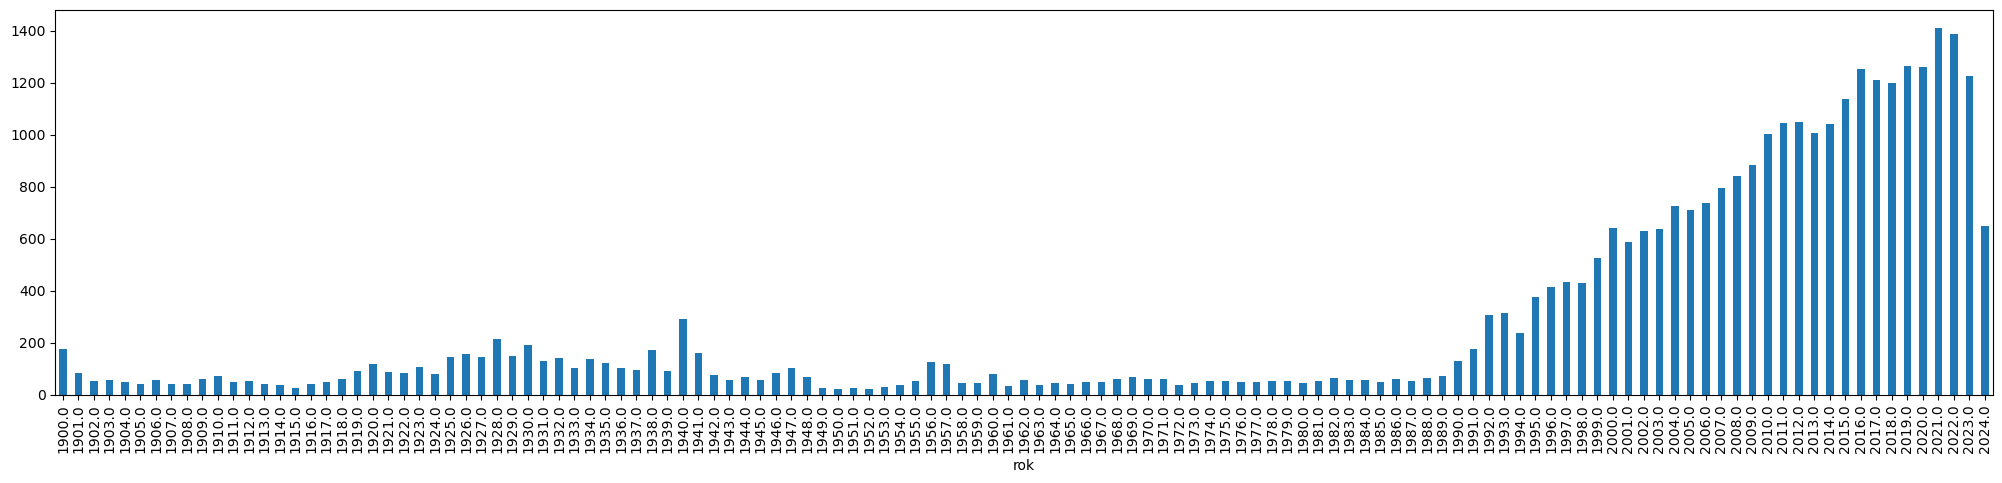

In [390]:
ceska_proza.groupby("rok").size().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

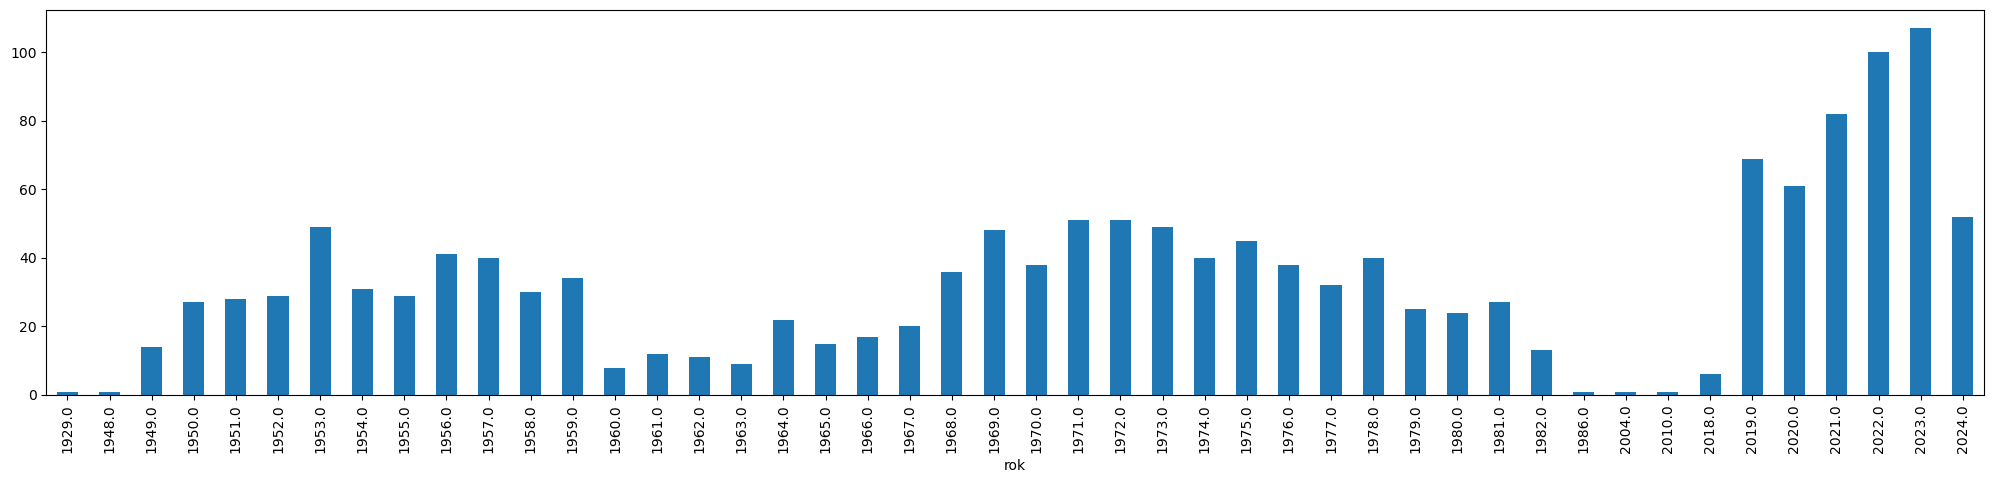

In [433]:
df[(df['520_a'].astype(str).str.lower().str.contains('česk',na=False) & df['520_a'].astype(str).str.lower().str.contains('román',na=False))].groupby("rok").size().plot.bar(figsize=(25,5))

In [437]:
df[(df['520_a'].astype(str).str.lower().str.contains('česk',na=False) & df['520_a'].astype(str).str.lower().str.contains('román',na=False)) & (df['041_h'].isnull())].sample(100).sort_values(by="rok")

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk194903191,981103s1949 xr 1 cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01012955],"[Branald, Adolf,]",[1910-2008],None,Severní nádraží :,[Adolf Branald],None,None,None,[2. vyd.],None,[Praha :],"[Československý spisovatel,]",[1949],[(Brno :],[Polygrafie)],None,None,None,None,None,"[407, [1] s. ;]",None,[8°],[Žatva ;],[Sv. 74],[30001-34000 výt.],"[Železničáři měli za okupace největší příležitost k illegální práci: jsou organisováni, pohybliví a po kolejích procházely jak válečné zásilky, tak i transporty vězňů. Z nádražní statistiky lze př...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Žatva (Československý spisovatel)],None,[Železničáři - okupace nacistická - romány],nam a22 1 4500,1949.0,Severní nádraží,2,407.0,NaN,2.0,NaN,981103
bk194903087,981031s1949 xr 000 | cze,None,"[Kčs 20,00]",[(Brož.) :],None,None,None,None,None,None,None,[aut],[jk01060764],"[Knap, Josef,]",[1900-1973],None,Selma Lagerlöf /,[napsal Josef Knap],None,None,None,[1. vyd.],None,[V Praze :],"[Česká akademie věd a umění,]",[1949],None,None,None,None,None,None,None,[30 s. :],None,[22 cm],None,None,[Životopisná a literární data],"[Studie o velké švédské autorce, ""v mnohém smyslu protičasovém ethickém zjevu"", tvořivším stranou hlavního proudění evropského idealistické, humanitní a tradicionální romány, povídky a legendy. Čl...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Lagerlöf, Selma (1858-1940 spisovatelka švédská) - studie]",nam a22 1 4500,1949.0,Selma Lagerlöf,2,30.0,20.0,1.0,brožovaná,981031
bk195000503,980812s1950 xr 1 cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01152141],"[Zápotocký, Antonín,]",[1884-1957],None,Bouřlivý rok 1905 :,[Antonín Zápotocký],None,None,None,[2. vyd.],None,[Praha :],"[Práce,]",[1950],None,None,None,None,None,None,None,"[352, [3] s. ;]",None,[8°],[Příliv],None,[20000 výt.],"[""Rok 1905 byl opravdu bouřlivým, revolučním rokem. V tomto roce po prvé náš pracující lid vystoupil jako samostatný činitel na politické kolbiště. Proklamoval svoje práva, hlásil se o ně a dal na...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Příliv],None,[Rok 1905 - hnutí socialistické - romány],nam a22 1 4500,1950.0,Bouřlivý rok 1905,3,352.0,NaN,2.0,NaN,980812
bk195001693,980825s1950 xr ||| 1 cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01011891],"[Bernášková, Alena,]",[1920-2007],None,Cesta otevřená :,[Alena Bernášková],None,None,None,[2. vyd.],None,[Praha :],"[Československý spisovatel,]",[1950],None,"[(Západomor. tisk., záv. Polygrafie)]",None,None,None,None,None,[360 s. ;],None,[8°],[Žatva ;],[sv. 80],[4001-7000 výt.],[Za války vybudovali Němci v českém pohraničí gigantický závod na výrobu synthetického benzinu z uhlí. Využili přitom otrocké práce válečných zajatců a jiných zavlečených příslušníků všech národů ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Žatva (Československý spisovatel)],None,[Stalinovy závody u Mostu - romány],nam a22 1 4500,1950.0,Cesta otevřená,2,360.0,NaN,2.0,NaN,980825
bk195100582,980115s1950 xr 1 cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01091013],"[Olbracht, Ivan,]",[1882-1952],None,Nikola Šuhaj loupežník /,[Ivan Olbracht],None,None,None,"[15. vyd., ve Svobodě 3. vyd.]",None,[Praha :],"[Svoboda,]",[1950],None,"[(Svoboda, n

<Axes: xlabel='rok'>

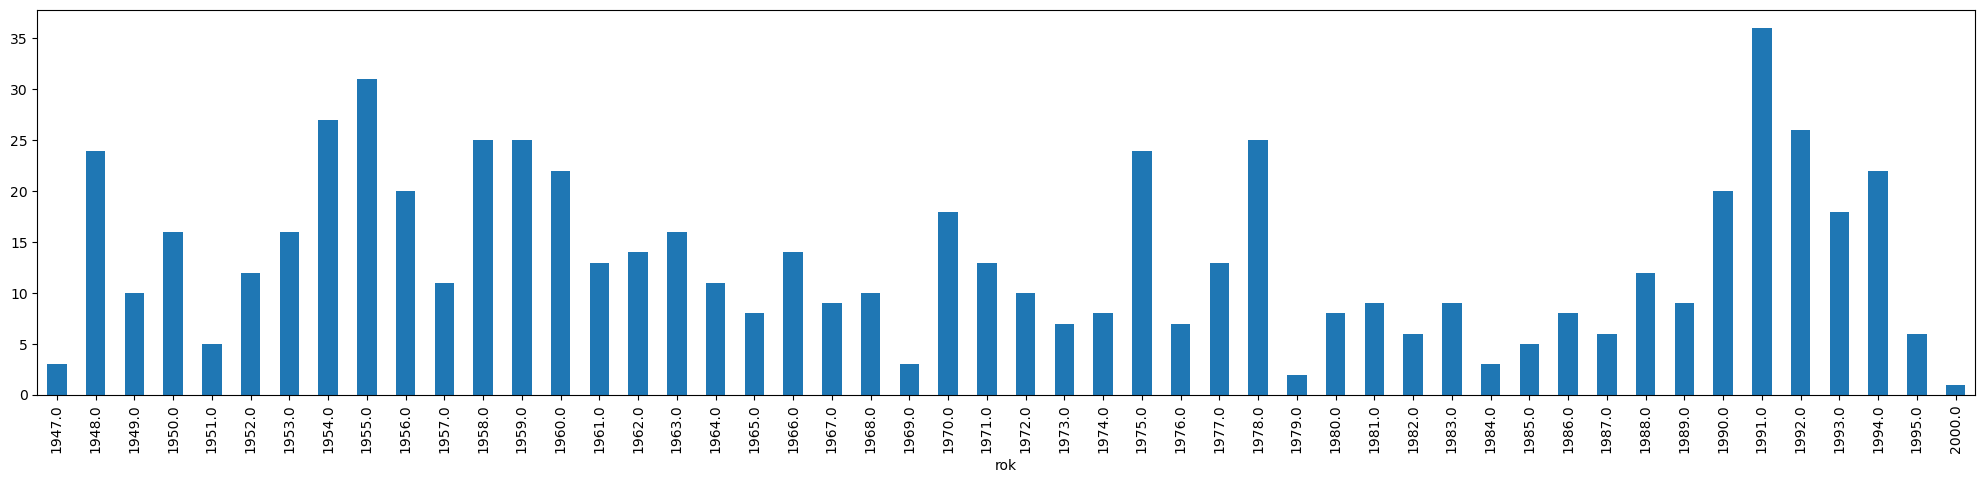

In [429]:
df[(df['964_a'].astype(str).str.lower().str.contains('česk',na=False) | df['964_a'].astype(str).str.contains('ČSR',na=False)) & (df['964_a'].astype(str).str.lower().str.contains('román',na=False) | (df['964_a'].astype(str).str.lower().str.contains('povíd',na=False)))].groupby("rok").size().plot.bar(figsize=(25,5))

In [439]:
df[df['245_a'].astype(str).str.contains('Elgarto')].sort_values(by="rok")

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20092006770,091016s2009 xr ac e 000 0 cze,[978-80-254-9689-3],None,"[(v knize neuvedeno ;, brož.)]",None,None,None,None,[373.5],[Střední školy],"[373.54, (437.322), (082.2)]",[aut],[mzk2009539581],"[Raffersbergová, Jana,]",[1945-],None,90. výročí založení školy Gymnázium Elgartova :,[[zpracovala J. Raffersbergová]],None,None,"[Gymnázium Elgartova 1919-2009 :, Gymnázium, Brno, Elgartova 3 - almanach 2009, Almanach 2009 - Gymnázium, Brno, Elgartova 3]",None,None,[Brno :],"[[Gymnázium Elgartova],]",[2009],None,None,None,None,None,None,None,[59 s. :],"[il. (převážně barev.), portréty ;]",[20 x 21 cm],None,None,None,None,None,None,None,"[1919-2009, 20.-21. století]","[gymnázia, high schools]",None,"[20.-21. století, 20th-21st centuries]","[Česko, Czechia]","[Brno (Česko), Brno (Czechia)]",None,"[jubilejní publikace, jubilee books]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,2009.0,90. výročí založení školy Gymnázium Elgartova,6,59.0,NaN,NaN,brožovaná,091016
nkc20183061558,181212s2019 xr ach g 001 0dcze,[978-80-270-5239-4],None,[(brožováno)],None,None,None,None,[373.5],[Střední školy],"[373.5-021.311, 37.091.3, 37.091(091), 37.091.12-057.177.3, (437.322), (059), (082.2), (0:82-94)]",[aut],None,"[Cupáková, Soňa]",None,None,100 let Gymnázia Elgartova :,"[autoři: Soňa Cupáková, Lenka Dalecká, Rudolf Dostálek, Jan Křeček, Dana Mikulková, Hana Naništová, Petr Odstrčil, Roman Plášek, Lukáš Wolf]",None,None,"[Sto let Gymnázia Elgartova, 100 - Gymnázium Elgartova, Almanach 100 - Gymnázium Elgartova]",None,None,None,None,None,None,None,None,[Brno :],"[Gymnázium Brno, Elgartova, příspěvková organizace,]",[2019],[1],[156 stran :],"[ilustrace (některé barevné), portréty, faksimile ;]",[23 x 24 cm +],None,None,[Chronologický přehled],None,None,None,None,"[1919-2019, 20.-21. století]","[gymnázia, studium a výuka, dějiny školství, ředitelé škol, high schools, study and teaching, history of education, school principals]",None,"[20.-21. století, 20.-21. století, 20.-21. století, 20.-21. století, 20th-21st centuries, 20th-21st centuries, 20th-21st centuries, 20th-21st centuries]","[Česko, Česko, Česko, Česko, Czechia, Czechia, Czechia, Czechia]","[Husovice (Brno, Česko), Husovice (Brno, Czechia)]",None,"[almanachy, jubilejní publikace, vzpomínky, almanacs, jubilee books, reminiscences]","[aut, aut, aut, aut, aut, aut, aut, aut]",None,"[Dalecká, Lenka, Dostálek, Rudolf, Křeček, Jan, Mikulková, Dana, Naništová, Hana, Odstrčil, Petr, Plášek, Roman, Wolf, Lukáš]",None,None,None,None,None,None,None,None,nam a22 i 4500,2019.0,100 let Gymnázia Elgartova,4,156.0,NaN,NaN,brožovaná,181212


In [441]:
df[df['245_a'].astype(str).str.contains('Favorit Brno')].sort_values(by="rok")

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk196701636,970818s1966 xr cze,None,None,None,None,None,None,None,None,None,[796.6(06.05)(437.2 Brno)(058)],None,None,None,None,None,Ročenka cyklistiky T[ělovýchovné] j[ednoty] Favorit Brno :,None,None,None,None,None,None,[Brno :],"[[nákl. vl.],]",[1966],None,[(G 02)],None,None,None,None,None,"[23, [1] s. ;]",None,[8°],None,None,[Fot. a tb. v textu],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[TJ Favorit (Brno, Česko)]",None,None,None,"[TJ (Favorit, Brno) - oddíl cyklistiky - rok 1961-1965 - přehledy, Cyklistika - přehledy]",nam a22 1 4500,1966.0,Ročenka cyklistiky T[ělovýchovné] j[ednoty] Favorit Brno,6,23.0,NaN,NaN,NaN,970818


In [415]:
df[df['245_a'].astype(str).str.contains('Druhá stráž')].sort_values(by="rok")

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk195504084,981106s1955 xr 1 cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01101638],"[Ptáček, Ladislav,]",[1908-1974],None,Druhá stráž :,[Ladislav Ptáček ; Il. Václav Hrbek],None,None,None,[1. vyd.],None,[Praha :],"[Naše vojsko,]",[1955],None,None,None,None,None,None,None,"[521, [2] s. ;]",None,[8°],[Za vlast ;],[Sv. 9],[10400 výt.],"[Román z vojenského prostředí zachycuje události deseti dramatických let 1935 až 1945. Autor sleduje životní osudy příslušníků posádky malého města poblíže Prahy v předmnichovské ČSR, po Mnichovu ...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Za vlast],None,"[ČSR okupovaná - odboj - romány, Partyzáni čeští - romány, Československá armáda předmnichovská - romány, ČSR předmnichovská - armáda - romány]",nam a22 1 4500,1955.0,Druhá stráž,2,521.0,NaN,1.0,NaN,981106
bk195603211,981210s1956 xr e 000 f cze,None,"[Kčs 25,00]",[(Váz.) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[jk01101638],"[Ptáček, Ladislav,]",[1908-1974],None,Druhá stráž :,[Ladislav Ptáček],None,None,None,[2. vyd.],None,[Praha :],"[Naše vojsko,]",[1956],None,None,None,None,None,None,None,"[476, [2] s. ;]",None,[8°],[Za vlast ;],[sv. 9],[12400 výt.],"[Hrdinou románu z vojenského prostředí let 1935-1945 je kolektiv desítky vojáků posádky malého města u Prahy. Zvláště vyniká postava vojína maďarské národnosti, který těžce nese prostředí předmnic...",None,None,None,None,None,None,None,None,None,None,[české romány],None,None,None,None,None,None,None,None,[Za vlast! (Naše vojsko)],None,"[ČSR okupovaná - odboj - romány, Partyzáni čeští - romány, Československá armáda předmnichovská - romány, ČSR předmnichovská - armáda - romány]",nam a22 1 4500,1956.0,Druhá stráž,2,476.0,25.0,2.0,pevná,981210
bk196000332,980416s1960 xr a e 000 f cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[jk01101638],"[Ptáček, Ladislav,]",[1908-1974],None,Druhá stráž :,[Ladislav Ptáček ; [il. Ivan Urbánek]],None,None,None,[3. vyd.],None,[Praha :],"[Naše vojsko,]",[1960],None,[(Polygrafia)],None,None,None,None,None,"[506, [2] s. ;]",None,[8°],[Za vlast ;],[sv. 9],[7000 výt.],None,None,None,None,None,None,None,None,None,None,None,[české romány],[ill],[jo2003193208],"[Urbánek, Ivan,]",[1933-1994],None,None,None,None,[Za vlast! (Naše vojsko)],None,"[Partyzáni čeští - romány, Československá armáda předmnichovská - romány, ČSR okupovaná - odboj - romány]",nam a22 1 4500,1960.0,Druhá stráž,2,506.0,NaN,3.0,NaN,980416


In [416]:
df[df['245_a'].astype(str).str.contains('Jízdenka do Kanady')].sort_values(by="rok")

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk197004281,970702s1970 xr ||| | cze,None,None,None,None,None,None,None,None,None,[885-311.3-311.2],[aut],[jk01041918],"[Hončík, Eduard,]",[1914-1988],None,Jízdenka do Kanady /,[Eduard Hončík],None,None,None,[1. vyd.],None,[Praha :],"[Svoboda,]",[1970],None,[(Rudé právo)],None,None,None,None,None,[268 s. ;],None,[8°],[Omnia],None,"[Na obálce použito kresby Jiřího Kodejše, Pozn. o autorovi]","[Psychologicky pojatý dobrodružný román o mladém českém chlapci, který se po útěku z Československa v r. 1948 dal do služeb nepřátelské špionážní centrály, za což je mu po skončení úkolu nabídnuta...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Omnia (Svoboda)],None,None,nam a22 1 4500,1970.0,Jízdenka do Kanady,3,268.0,NaN,1.0,NaN,970702
bk197004281,970702s1970 xr ||| | cze,None,None,None,None,None,None,None,None,None,[885-311.3-311.2],[aut],[jk01041918],"[Hončík, Eduard,]",[1914-1988],None,Jízdenka do Kanady /,[Eduard Hončík],None,None,None,[1. vyd.],None,[Praha :],"[Svoboda,]",[1970],None,[(Rudé právo)],None,None,None,None,None,[268 s. ;],None,[8°],[Omnia],None,"[Na obálce použito kresby Jiřího Kodejše, Pozn. o autorovi]","[Psychologicky pojatý dobrodružný román o mladém českém chlapci, který se po útěku z Československa v r. 1948 dal do služeb nepřátelské špionážní centrály, za což je mu po skončení úkolu nabídnuta...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Omnia (Svoboda)],None,None,nam a22 1 4500,1970.0,Jízdenka do Kanady,3,268.0,NaN,1.0,NaN,970702


In [ ]:
df[df['245_a'].astype(str).str.contains('Katapult')].sort_values(by="rok")

In [ ]:
df[df['245_a'].astype(str).str.contains('Příběhy detektiva Ouška')].sort_values(by="rok")

In [399]:
df[df['245_a'].astype(str).str.contains('Tiket na tutovku')].sort_values(by="rok")

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ck8705551,871111s1987 xr a u0|0 cze,None,[8 Kčs],[(Brož.) :],None,None,None,None,None,None,[885.0-32],[aut],[jo20000080330],"[Císařovský, Michal]",None,None,Tiket na tutovku /,"[Michal Císařovský ; il., graf. úprava a obálka I. Vršecká]",None,None,None,None,None,[Praha :],"[Naše vojsko,]",[1987],None,None,None,None,None,None,None,[127 s. :],[il. ;],[20 cm],[Magnet ;],[8/87],None,None,None,None,None,None,None,None,None,None,None,None,None,[bjd],None,"[Vršecká, Iva]",None,None,None,None,None,[Magnet (Naše vojsko)],None,None,nam a22 4500,1987.0,Tiket na tutovku,3,127.0,8.0,NaN,brožovaná,871111


In [374]:
df[df['245_a'].astype(str).str.contains('Kámen a bolest')].sort_values(by="rok")

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk194202414,990319s1942 xr af 000 cze,None,"[K 138,00]",[(Váz.) :],None,None,None,None,None,None,None,[aut],[jk01111165],"[Schulz, Karel,]",[1899-1943],None,Kámen a bolest :,[Karel Schulz],"[[Díl první,]",[V zahradách medicejských] /],"[Michelangelo Buonarroti, V zahradách medicejských]",[1. vyd.],None,[V Praze :],"[Vyšehrad,]",[1942],None,"[(Č.A.T., Českomoravské akciové tiskařské a vydavatelské podniky)]",None,None,None,None,None,"[622 s., [2] l. obr. příl. :]",[il. ;],[20 cm],None,None,"[Část nákladu brož. (K 120,00)]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1942.0,Kámen a bolest,3,622.0,138.0,1.0,pevná,990319
bk194803593,980909s1947 xr acfj 000 1 cze,None,"[Kčs 260,00]",[(Brož.) :],None,None,None,None,None,None,None,[aut],[jk01111165],"[Schulz, Karel,]",[1899-1943],None,Kámen a bolest :,[Karel Schulz ; [s předmluvou Aloyse Skoumala]],None,None,[Michelangelo Buonarroti],[2. vyd.],None,[V Praze :],"[Vyšehrad,]",[1947],None,[(Č.A.T.)],None,None,None,None,None,"[649 s., [14] s. obr. příl. :]","[il., portréty, geneal. tabulka ;]",[24 cm],None,None,[10000 výt.],None,None,None,None,None,None,None,None,None,None,None,None,[aui],[jk01111589],"[Skoumal, Aloys,]",[1904-1988],None,None,None,None,None,None,[Michelangelo Buonarroti - romány],nam a22 1 4500,1947.0,Kámen a bolest,3,649.0,260.0,2.0,brožovaná,980909
bk515500221,981113s1952 xr g 000 f cze,None,"[Kčs 136,00]",[(Váz.) :],None,None,None,None,"[821.162.3-3, 929]","[Česká próza, Biografie]","[821.162.3-31, 730.071.1, 72/76.071.1, 929, (450), (0:82-312.6), (0:82-311.6)]",[aut],[jk01111165],"[Schulz, Karel,]",[1899-1943],None,Kámen a bolest /,[Karel Schulz],None,None,None,[3. vyd.],None,[Praha :],"[Vyšehrad,]",[1952],None,None,None,None,None,None,None,[647 s. ;],None,[8°],[Živý odkaz domova : knihovna národních klasiků ;],[sv. 19],"[15400 výt., Frontispis a kresba na obálce Max Švabinský, Iniciály nakreslil, obálku a vazbu navrhl a graficky upravil Jiří Blažek]",None,None,None,None,"[15.-16. století, 1475-1564]","[sochaři, výtvarní umělci]",None,"[15.-16. století, 15.-16. století]","[Itálie, Itálie]",None,None,"[české romány, biografické romány, historické romány]",None,None,None,None,None,None,None,None,[Živý odkaz domova],None,None,nam a22 a 4500,1952.0,Kámen a bolest,3,647.0,136.0,3.0,pevná,981113
bk195703973,981020s1957 xr acfjg 000 f cze,None,"[Kčs 37,00]",[(Váz.) :],None,None,None,None,"[821.162.3-3, 929]","[Česká próza, Biografie]","[821.162.3-31, 730.071.1, 72/76.071.1, 929, (450), (0:82-312.6), (0:82-311.6)]",[aut],[jk01111165],"[Schulz, Karel,]",[1899-1943],None,Kámen a bolest :,[Karel Schulz ; [doslov napsal Aloys Skoumal]],None,None,[Michelangelo Buonarroti],"[4. vyd., v Československém spisovateli 1. vyd.]",None,[Praha :],"[Československý spisovatel,]",[1957],None,[(Brněnské knihtiskárny)],None,None,None,None,None,"[621 s., [32] s. obr. příl. :]","[il., portréty ;]",[8°],[Žatva ;],[sv. 233],"[25000 výt., Typograficky upravil a obálku a vazbu navrhl Zdenek Seydl, Tab. rodu Medicejských, Ediční poznámka]","[V novém vydání vychází vrcholné dílo Karla Schulze (1899-1943), v němž jsou s hlubokou znalostí vylíčeny osudy geniálního italského sochaře, malíře a básníka Michelangela Buonarottiho a jeho tvůr...",None,None,None,"[15.-16. století, 1475-1564]","[sochaři, výtvarní umělci]",None,"[15.-16. století, 15.-16. století]","[Itálie, Itálie]",None,None,"[české romány, biografické r

In [356]:
df[df['rok'] == 1920].sample(60)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nos190102018,000616s1920 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01011106],"[Batěk, Alexandr,]",[1874-1944],None,Náš volební boj /,[Alexandr Sommer Batěk],None,None,None,None,None,"[Břevnov ;, Liboc :]","[nákl. vl.,]",[1920],None,None,None,None,None,None,None,[16 s. ;],None,[8°],[Volné sdružení Klasů ;],[88],"[Autor též používal pseud.: Heliar, Lešek]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Volné sdružení Klasů],None,None,nam a22 1 4500,1920.0,Náš volební boj,3,16.0,NaN,NaN,NaN,000616
bkn20020602372,981214s1920 xr cze,None,None,[(Brož.)],None,None,None,None,None,None,None,[aut],[jk01021057],"[Čapková, Helena,]",[1886-1961],None,Malé děvče /,[Helena Čapková],None,None,None,None,None,[Praha :],"[Ot. Štorch-Marien,]",[1920],None,None,None,None,None,None,None,[48 s. ;],None,[8°],[Aventinum ;],[sv. 14],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Aventinum],None,None,nam a22 4500,1920.0,Malé děvče,2,48.0,NaN,NaN,brožovaná,981214
nos190244453,001016s1920 xr f 000 0 cze,None,None,[(Brožováno)],None,None,None,None,[514],[Geometrie],"[514.18, (048.8)]",[aut],[jk01120252],"[Sobotka, Jan,]",[1862-1931],None,O křivosti plochy řádu vyššího v obyčejném bodě /,[napsal J. Sobotka],None,None,None,None,None,None,None,None,None,None,None,[V Praze :],"[nákladem České akademie věd a umění,]",[1920],[1],[13 stran ;],None,[26 cm],[Rozpravy České akademie věd a umění ;],"[ročník XXIX, třída II, číslo 20]","[Název z obálky, Vyšlo též jako součást seriálu Rozpravy České akademie věd a umění]",None,None,None,None,None,[deskriptivní geometrie],None,None,None,None,None,[studie],None,None,None,None,None,None,None,None,[Rozpravy České akademie věd a umění.],[Česká akademie věd a umění],None,nam a22 1i 4500,1920.0,O křivosti plochy řádu vyššího v obyčejném bodě,8,13.0,NaN,NaN,brožovaná,001016
nos190108182002,000224s1920 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01022773],"[Dostál, Alois,]",[1858-1934],None,Z pouti mládí :,[Alois Dostál],None,None,None,[[Nové ob. vyd.]],None,[Praha :],"[Bačkovský :, Slovanské,]",[1920],None,None,None,None,None,None,None,[279 s. ;],None,[š. 8°],[Sbírka spisů vynik. spisovatelů čes. pro mládež ;],[LI],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Sbírka spisů vynik. spisovatelů čes. pro mládež],None,None,nam a22 1 4500,1920.0,Z pouti mládí,3,279.0,NaN,NaN,NaN,000224
cpk19960167006,970514s1920 xr e 000 1 cze,None,None,[(Váz.)],[cze],[eng],[1],None,[821.111-3],"[Anglická próza, anglicky psaná]",[820-31],[aut],[jn20000601907],"[Glyn, Elinor,]",[1864-1943],[Česky],Manželka a milenka :,[Elinor Glynová ; z angličtiny přeložil Karel Weinfurter],None,None,None,None,None,[V Praze :],"[Zemědělské knihkupectví A. Neubert,]",[1920],None,None,None,None,None,None,None,[344 s. ;],None,[18 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,[romány],[trl],[jk01151502],"[Weinfurter, Karel,]",[1867-1942],None,None,None,None,None,None,None,nam a22 a 4500,1920.0,Manželka a milenka,3,344.0,NaN,NaN,pevná,970514
nos190248163,000821s1920 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],None,"[Šmelík, Max]",None,None,"Fretka, její život, rozmnožování, chov, nemoci a výcvik ku lovu králíků /",[Max Šmelík],None,None,None,None,None,[Praha :],"[A. Neubert,]",[1920],None,None,None,None,